<a href="https://colab.research.google.com/github/athariqmn97/Finpro-Rakamin-DS56-Kelompok2/blob/main/Master_Code_Kelompok_2_DANN_Co_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 18 - Final Project Stage 2 - DANN Co.
**Data Solution & Data Driven**

Member of DANN Co. :
1. Dadin Tajudin (Project Manager)
2. Athariq Marsha Nugraha (Data Engineer)
3. Nada Paradita (Data Scientist)
4. Nida Febiana (Business / Data Analyst)

# Load Data Set, Data Overview, Kategorisasi Data

## Load Data Set

In [1]:
from google.colab import files
uploaded = files.upload()

Saving employee_churn_prediction_updated.csv to employee_churn_prediction_updated.csv


## Data Overview

In [2]:
# Import
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

numpy version :  2.0.2
pandas version :  2.2.2
seaborn version :  0.13.2


In [3]:
# Load Data Set, Overview, dan Kategorisasi
df = pd.read_csv('employee_churn_prediction_updated.csv')
df.head(5)

employee_id  age  gender    education  experience_years  monthly_target  \
0            1   28    Male  High School                 0             153   
1            2   41    Male      Diploma                 6             188   
2            3   36  Female  High School                 8             159   
3            4   32    Male      Diploma                 7             185   
4            5   29  Female  High School                 7             142   

   target_achievement  working_hours_per_week  overtime_hours_per_week  \
0                0.94                      62                        9   
1                0.54                      55                        8   
2                0.44                      59                       10   
3                0.66                      68                       15   
4                1.01                      45                        9   

    salary  commission_rate  job_satisfaction work_location  \
0  4667108             0.03                 4      Suburban   
1  5853507             0.06                 3         Urban   
2  4781336             0.07                 1         Urban   
3  3624588             0.05                 1         Urban   
4  5154327             0.08                 3         Rural   

   manager_support_score  company_tenure_years  churn marital_status  \
0                      3                   2.8      0        Married   
1                      3                   2.7      1         Single   
2                      2                   1.7      1         Single   
3                      2                   0.5      1        Married   
4                      2                   4.5      0         Single   

   distance_to_office_km churn_period  
0                     22       Stayed  
1                     36   Onboarding  
2                     17   Onboarding  
3                     32   Onboarding  
4                     14       Stayed

In [4]:
df.describe()

employee_id          age  experience_years  monthly_target  \
count  1000.000000  1000.000000       1000.000000     1000.000000   
mean    500.500000    32.845000          4.495000      125.877000   
std     288.819436     6.854046          2.890732       43.895748   
min       1.000000    22.000000          0.000000       50.000000   
25%     250.750000    27.000000          2.000000       86.750000   
50%     500.500000    33.000000          5.000000      127.500000   
75%     750.250000    39.000000          7.000000      164.000000   
max    1000.000000    44.000000          9.000000      199.000000   

       target_achievement  working_hours_per_week  overtime_hours_per_week  \
count          1000.00000             1000.000000              1000.000000   
mean              0.79188               54.102000                 9.508000   
std               0.22872                8.721907                 5.739066   
min               0.40000               40.000000                 0.000000   
25%               0.59000               46.000000                 5.000000   
50%               0.79000               54.000000                 9.500000   
75%               0.99000               62.000000                15.000000   
max               1.20000               69.000000                19.000000   

             salary  commission_rate  job_satisfaction  manager_support_score  \
count  1.000000e+03      1000.000000       1000.000000             1000.00000   
mean   5.487914e+06         0.058830          2.524000                2.53200   
std    1.436482e+06         0.023278          1.125474                1.11724   
min    3.000037e+06         0.020000          1.000000                1.00000   
25%    4.258970e+06         0.040000          2.000000                2.00000   
50%    5.471270e+06         0.060000          3.000000                3.00000   
75%    6.727894e+06         0.080000          4.000000                4.00000   
max    7.999712e+06         0.100000          4.000000                4.00000   

       company_tenure_years        churn  distance_to_office_km  
count            1000.00000  1000.000000            1000.000000  
mean                2.59800     0.629000              24.119000  
std                 1.40282     0.483314              13.978062  
min                 0.10000     0.000000               1.000000  
25%                 1.40000     0.000000              12.000000  
50%                 2.60000     1.000000              23.500000  
75%                 3.80000     1.000000              36.000000  
max                 5.00000     1.000000              49.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_id              1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   gender                   1000 non-null   object 
 3   education                1000 non-null   object 
 4   experience_years         1000 non-null   int64  
 5   monthly_target           1000 non-null   int64  
 6   target_achievement       1000 non-null   float64
 7   working_hours_per_week   1000 non-null   int64  
 8   overtime_hours_per_week  1000 non-null   int64  
 9   salary                   1000 non-null   int64  
 10  commission_rate          1000 non-null   float64
 11  job_satisfaction         1000 non-null   int64  
 12  work_location            1000 non-null   object 
 13  manager_support_score    1000 non-null   int64  
 14  company_tenure_years     

In [6]:
df.describe(include='object')

gender education work_location marital_status churn_period
count    1000      1000          1000           1000         1000
unique      2         3             3              2            4
top      Male   Diploma         Urban         Single       Stayed
freq      703       404           500            606          371

## Kategorisasi Data

In [9]:
df.columns

Index(['employee_id', 'age', 'gender', 'education', 'experience_years',
       'monthly_target', 'target_achievement', 'working_hours_per_week',
       'overtime_hours_per_week', 'salary', 'commission_rate',
       'job_satisfaction', 'work_location', 'manager_support_score',
       'company_tenure_years', 'churn', 'marital_status',
       'distance_to_office_km', 'churn_period'],
      dtype='object')

In [10]:
# variabel numerical
nums = ['age', 'experience_years', 'monthly_target', 'target_achievement',
        'working_hours_per_week', 'overtime_hours_per_week', 'salary',
        'commission_rate', 'company_tenure_years', 'job_satisfaction',
        'manager_support_score', 'distance_to_office_km', 'churn']

# variabel kategorikal
## bertingkat
cat_bertingkat = ['education', 'churn_period', 'work_location']

## tidak bertingkat
cat_biasa = ['gender', 'marital_status', 'churn' ]

# Total 19 Parameters

# Univariate & Multivariate Analysis

## Univariate Analysis

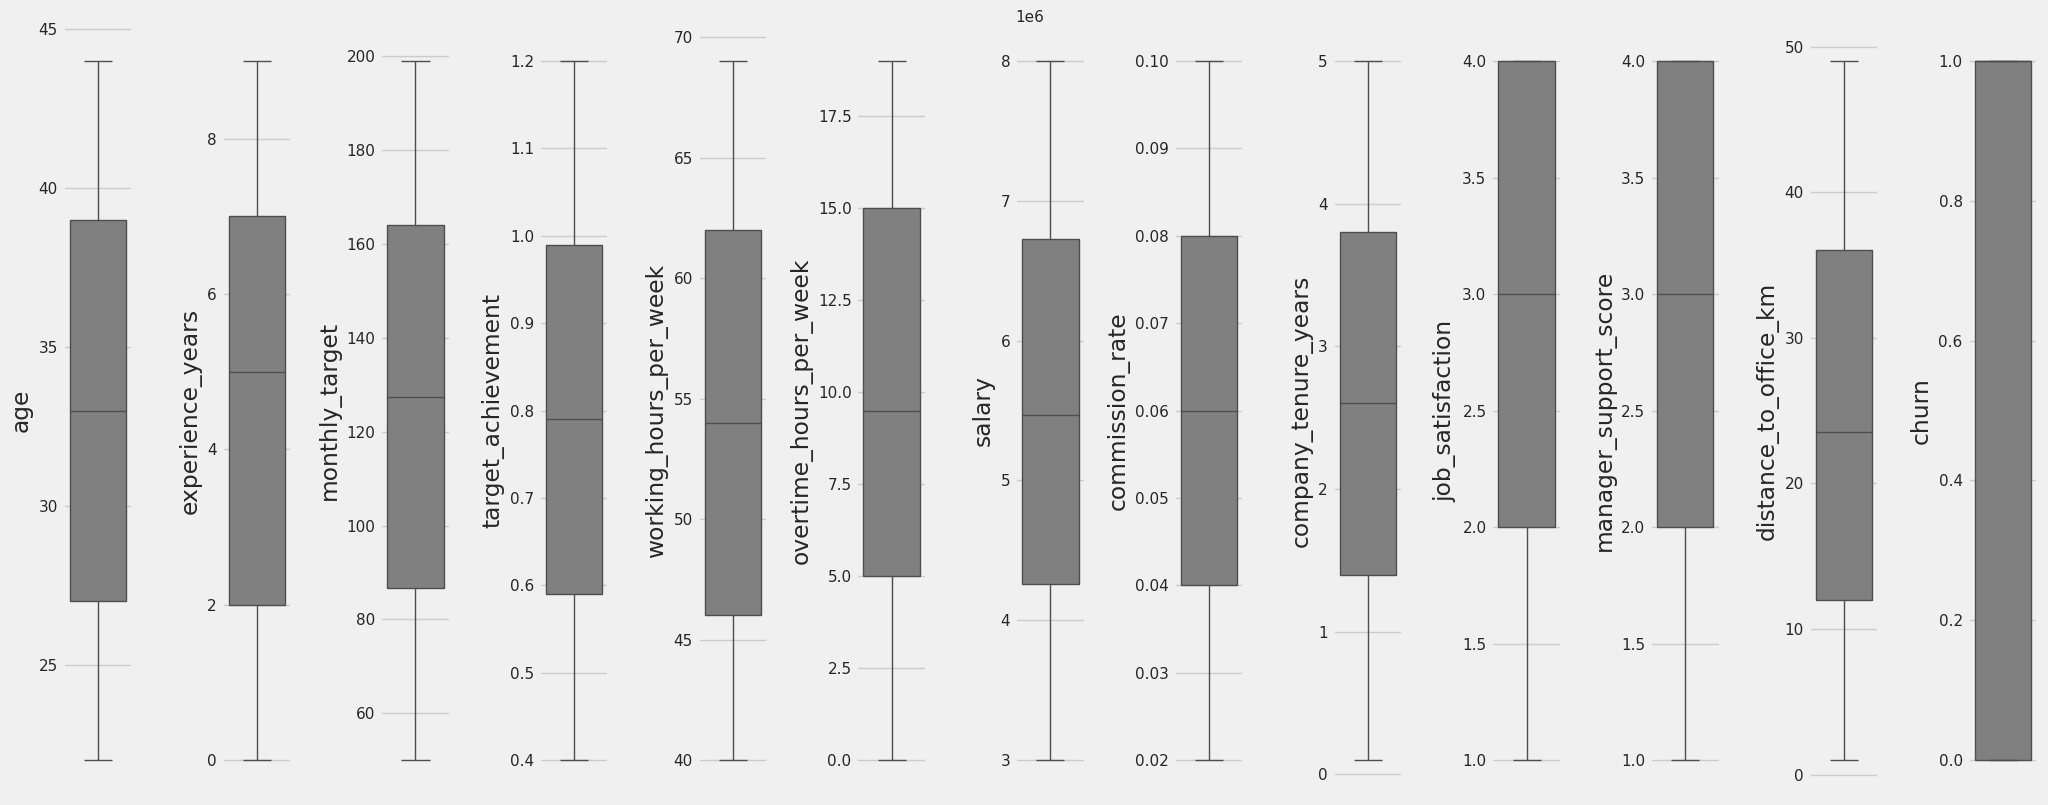

In [11]:
# Box Plot
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()
plt.show()

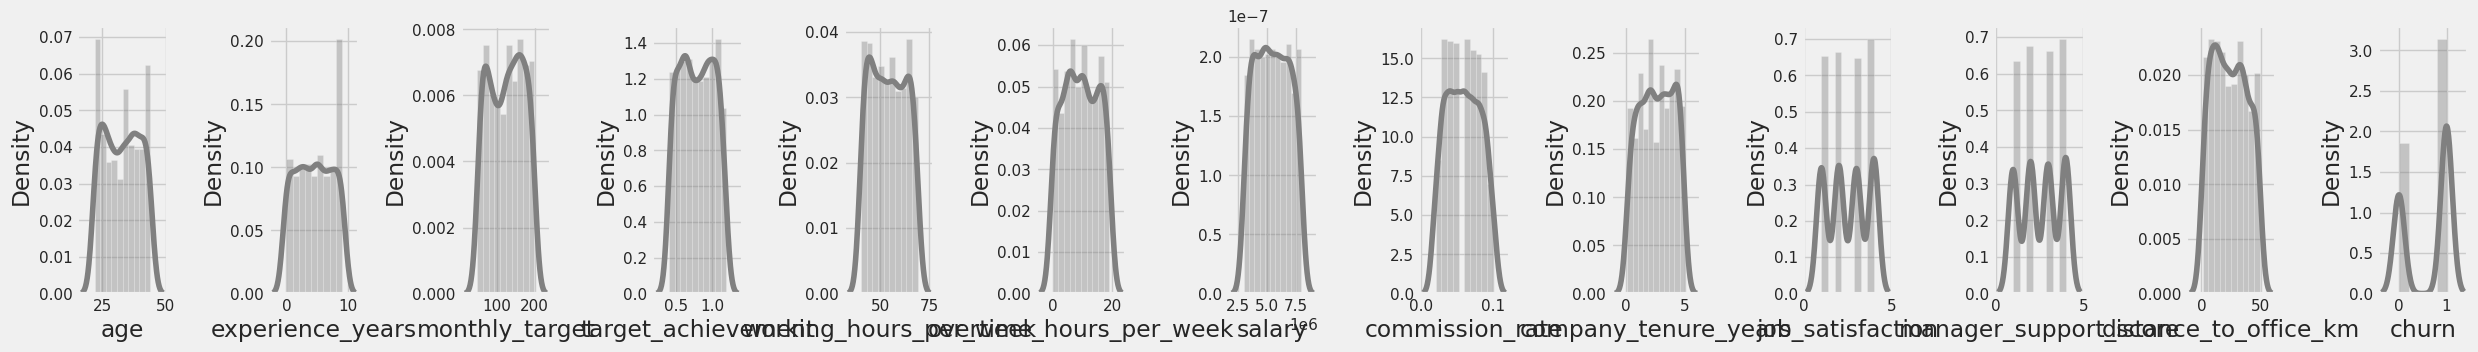

In [12]:
# Dist Plot
plt.figure(figsize=(25, 10))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums), i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()
plt.show()

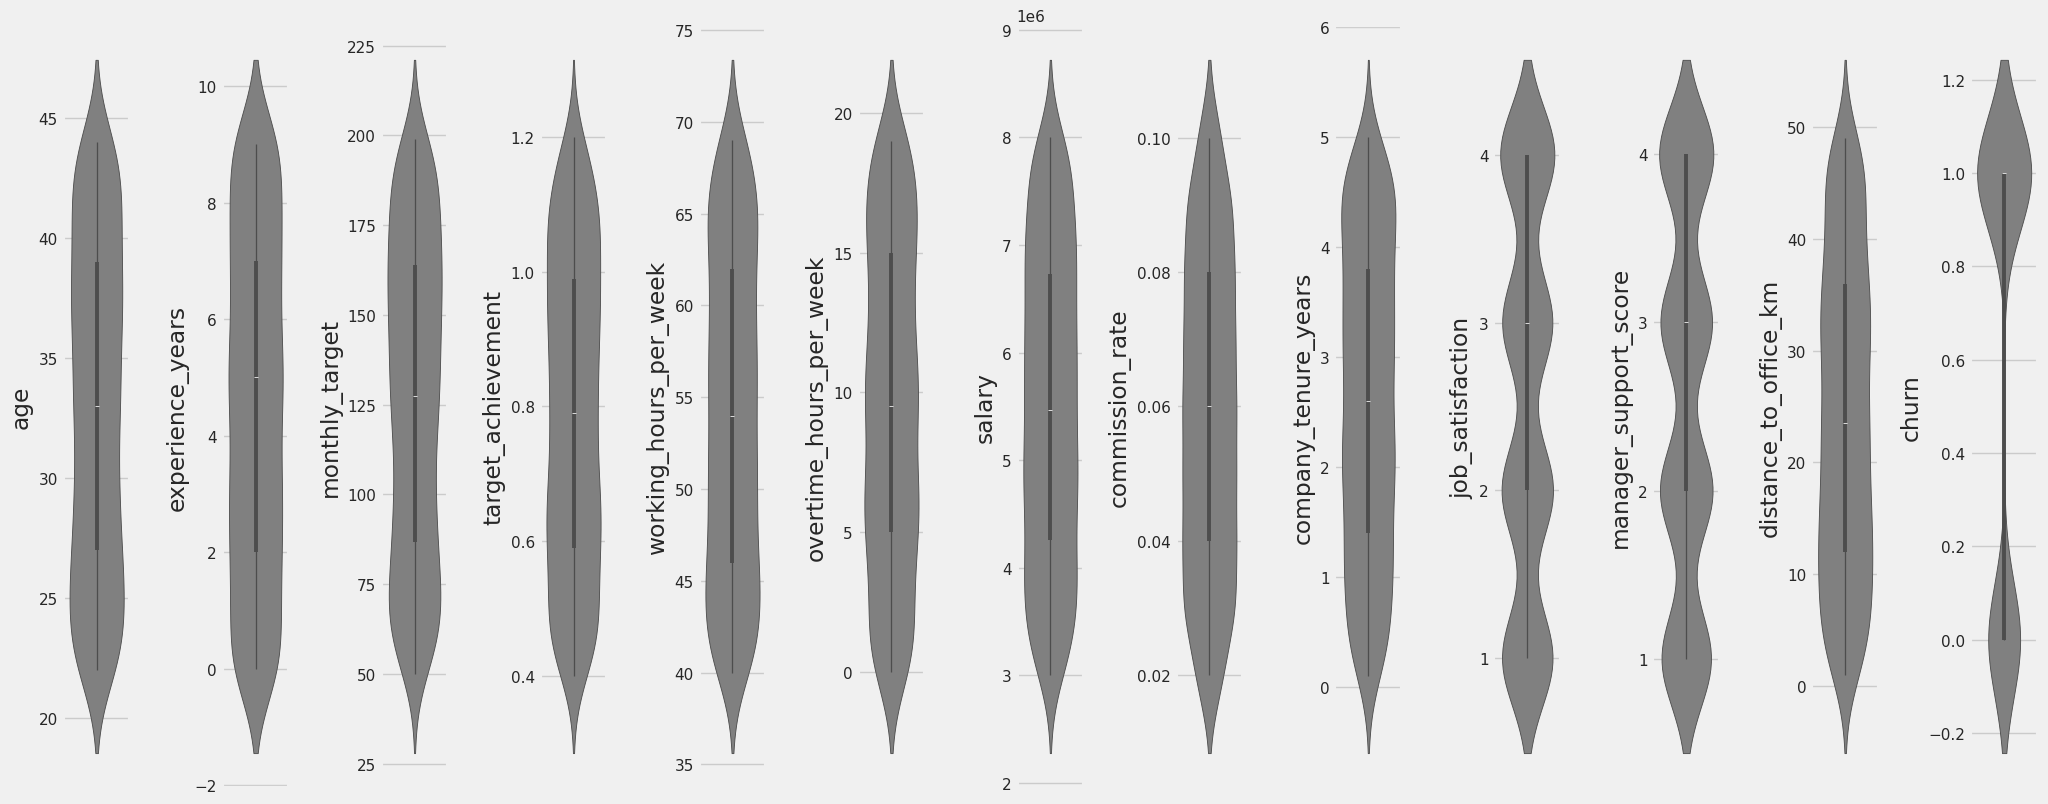

In [13]:
# Violin Plot
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()
plt.show()

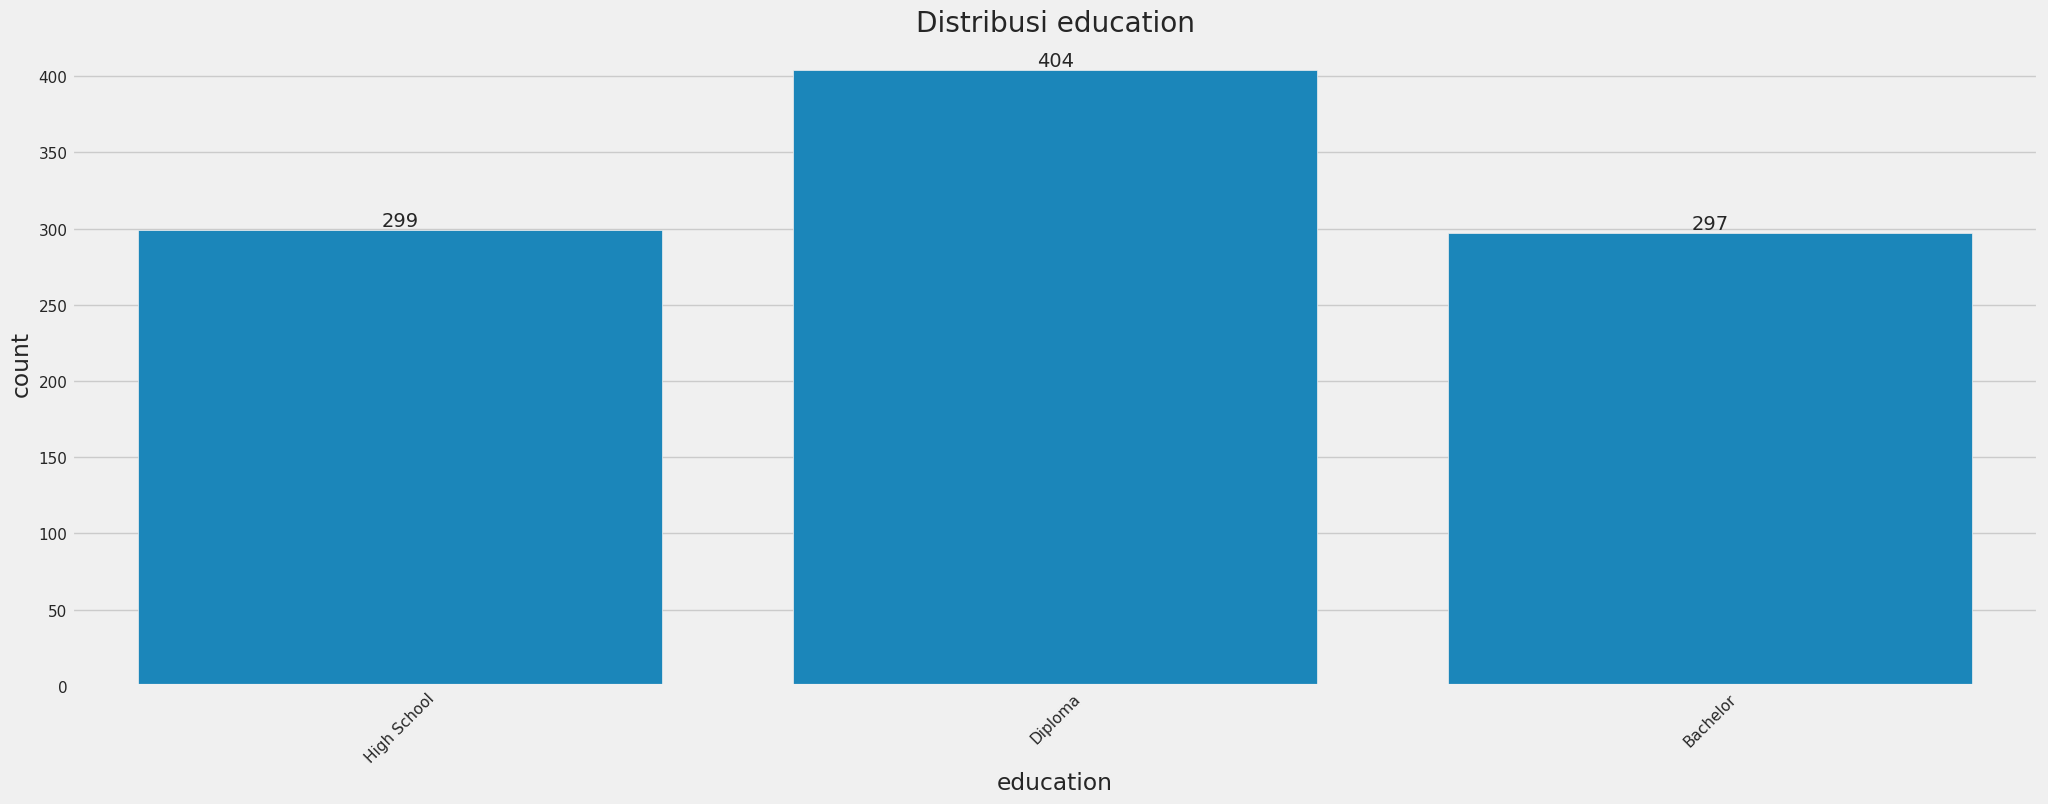

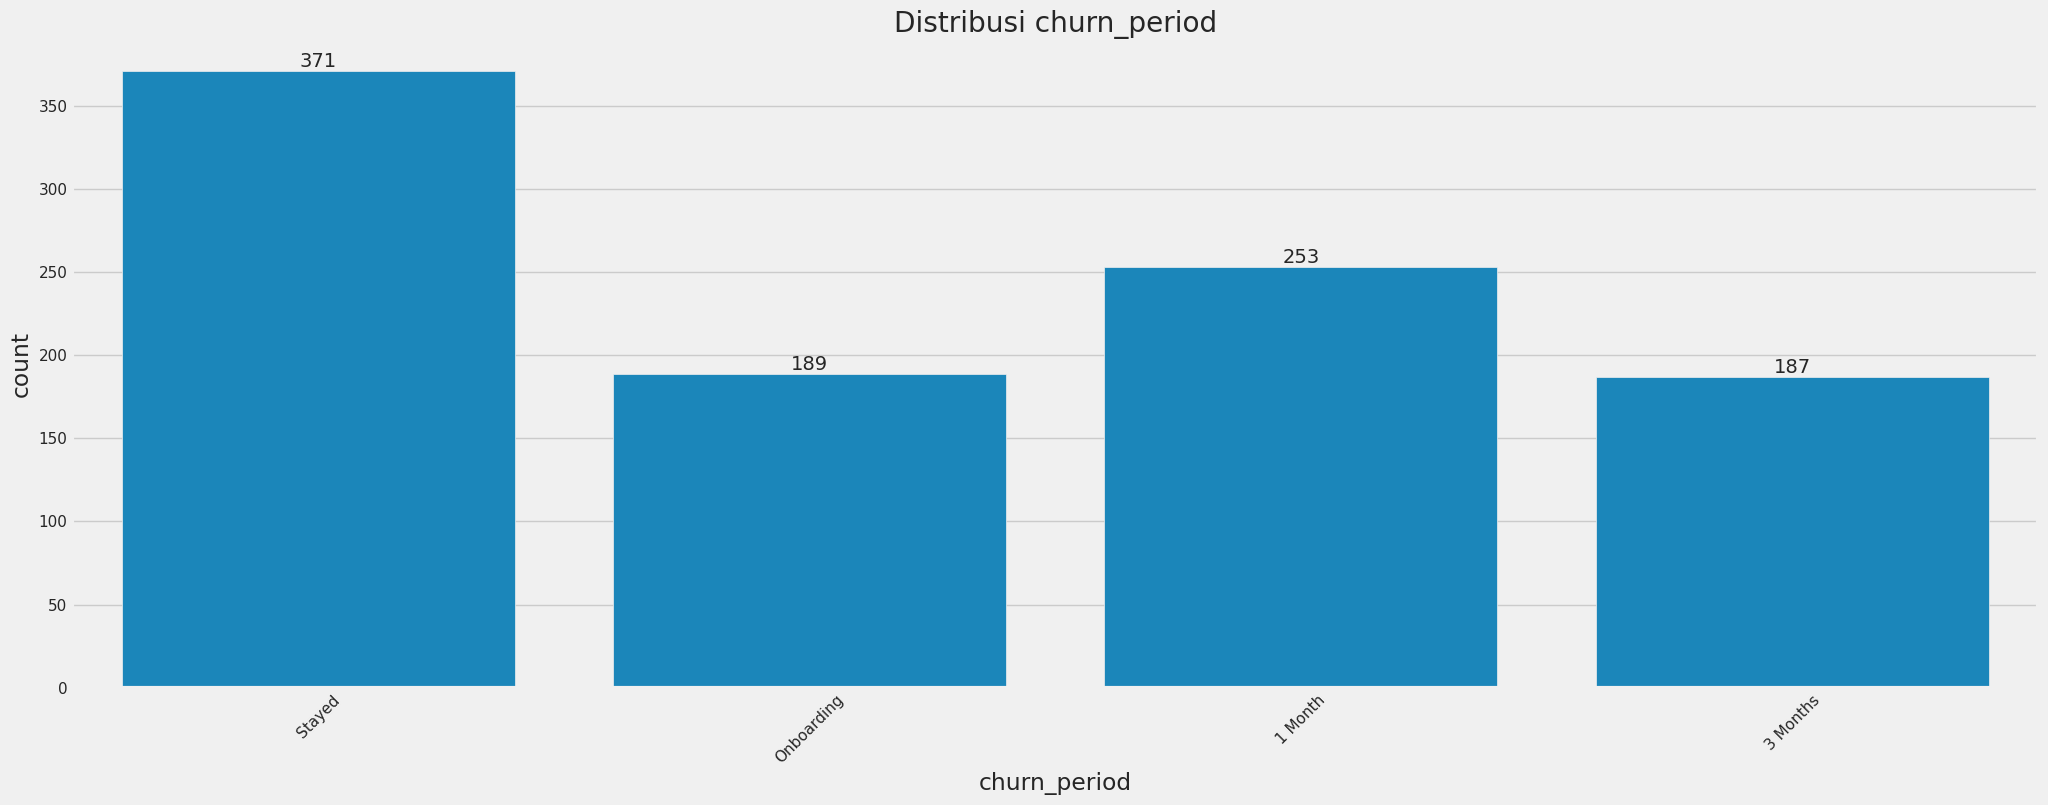

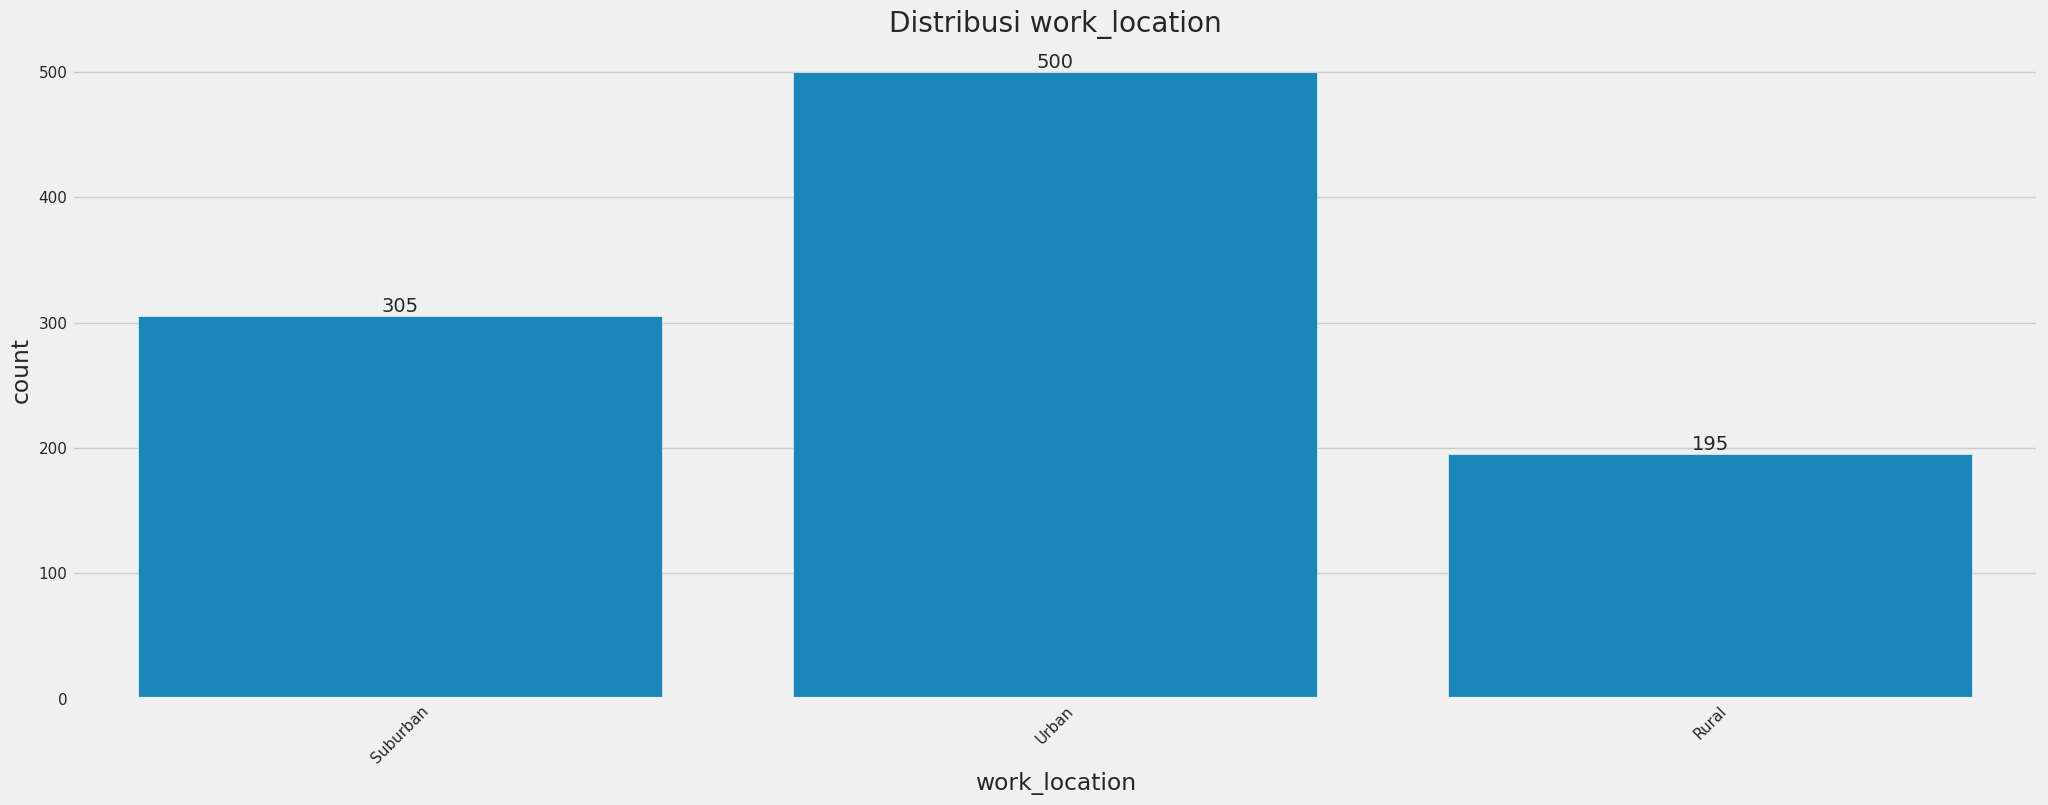

In [14]:
# === 1) UNIVARIATE ANALYSIS – KATEGORIKAL ===
for col in cat_bertingkat:
    plt.figure()
    ax = sns.countplot(data=df, x=col)
    ax.bar_label(ax.containers[0])  # langsung munculin angka di atas bar
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

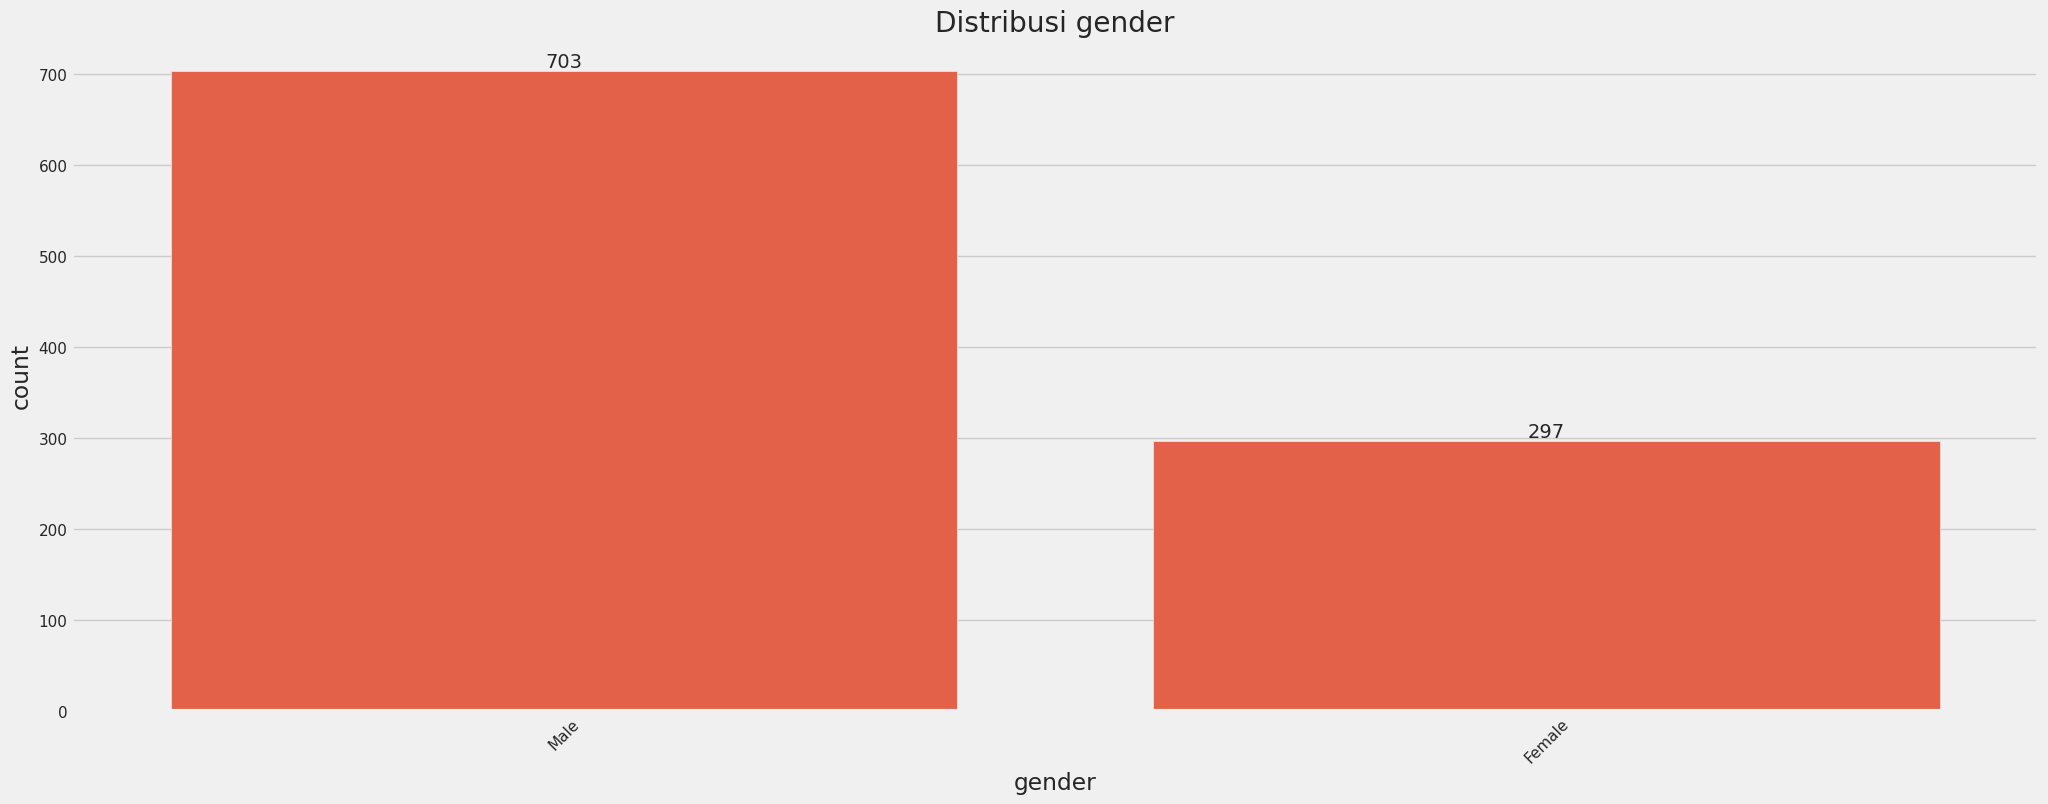

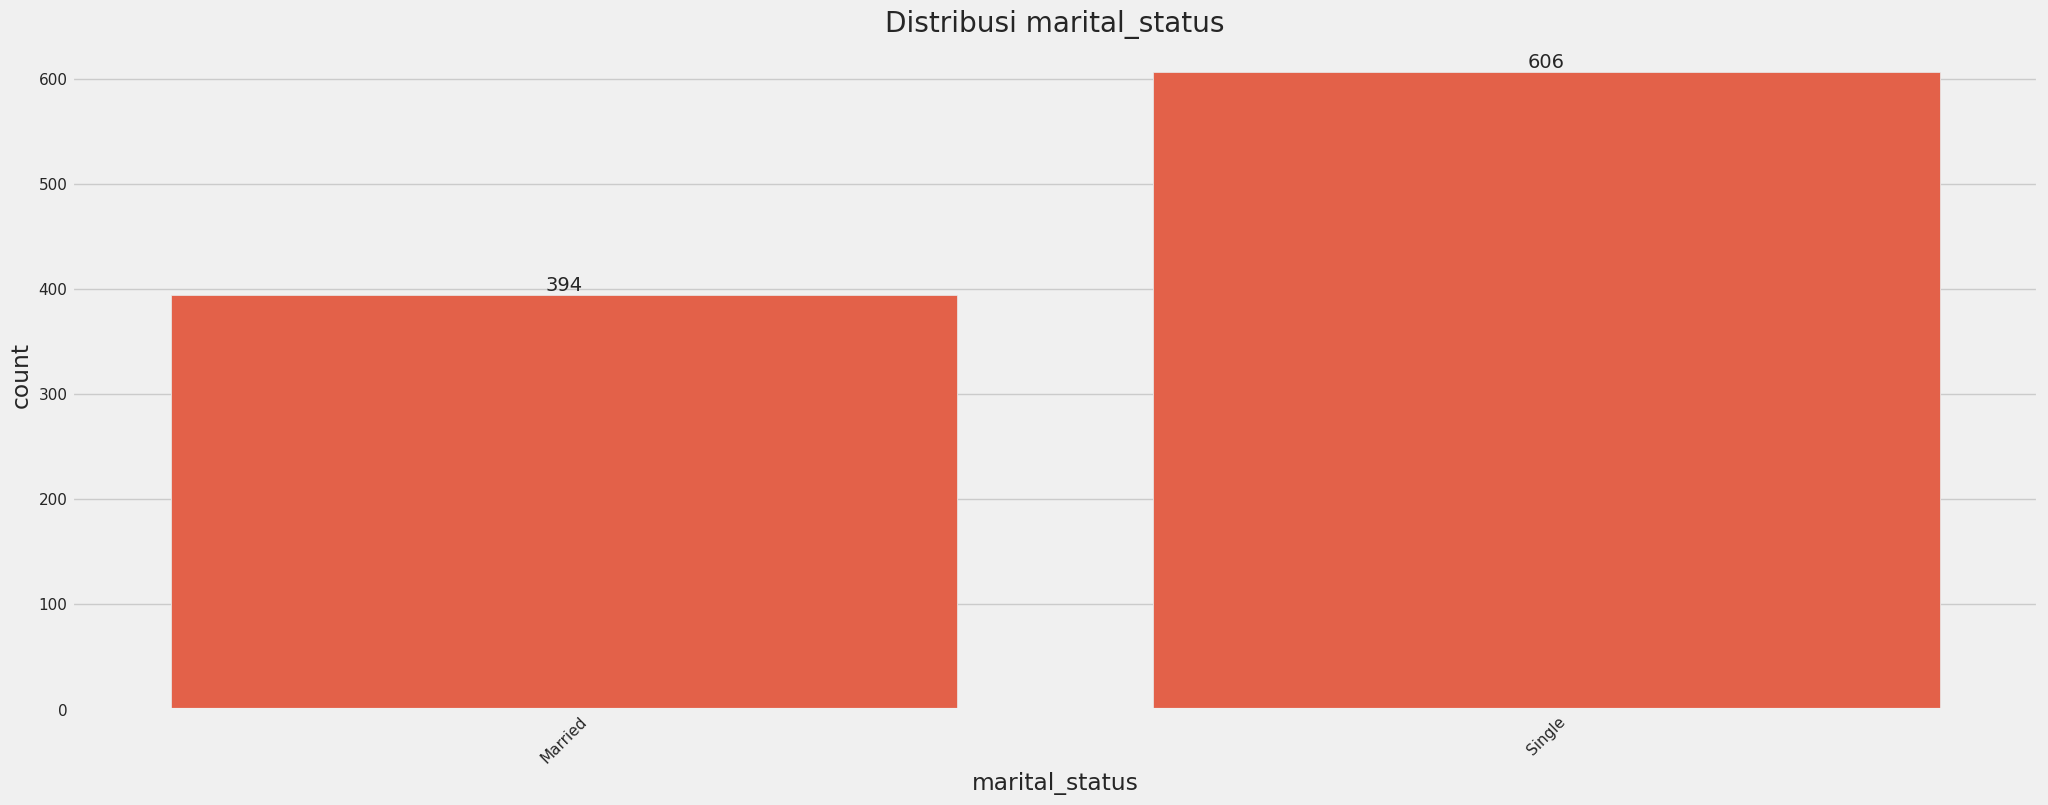

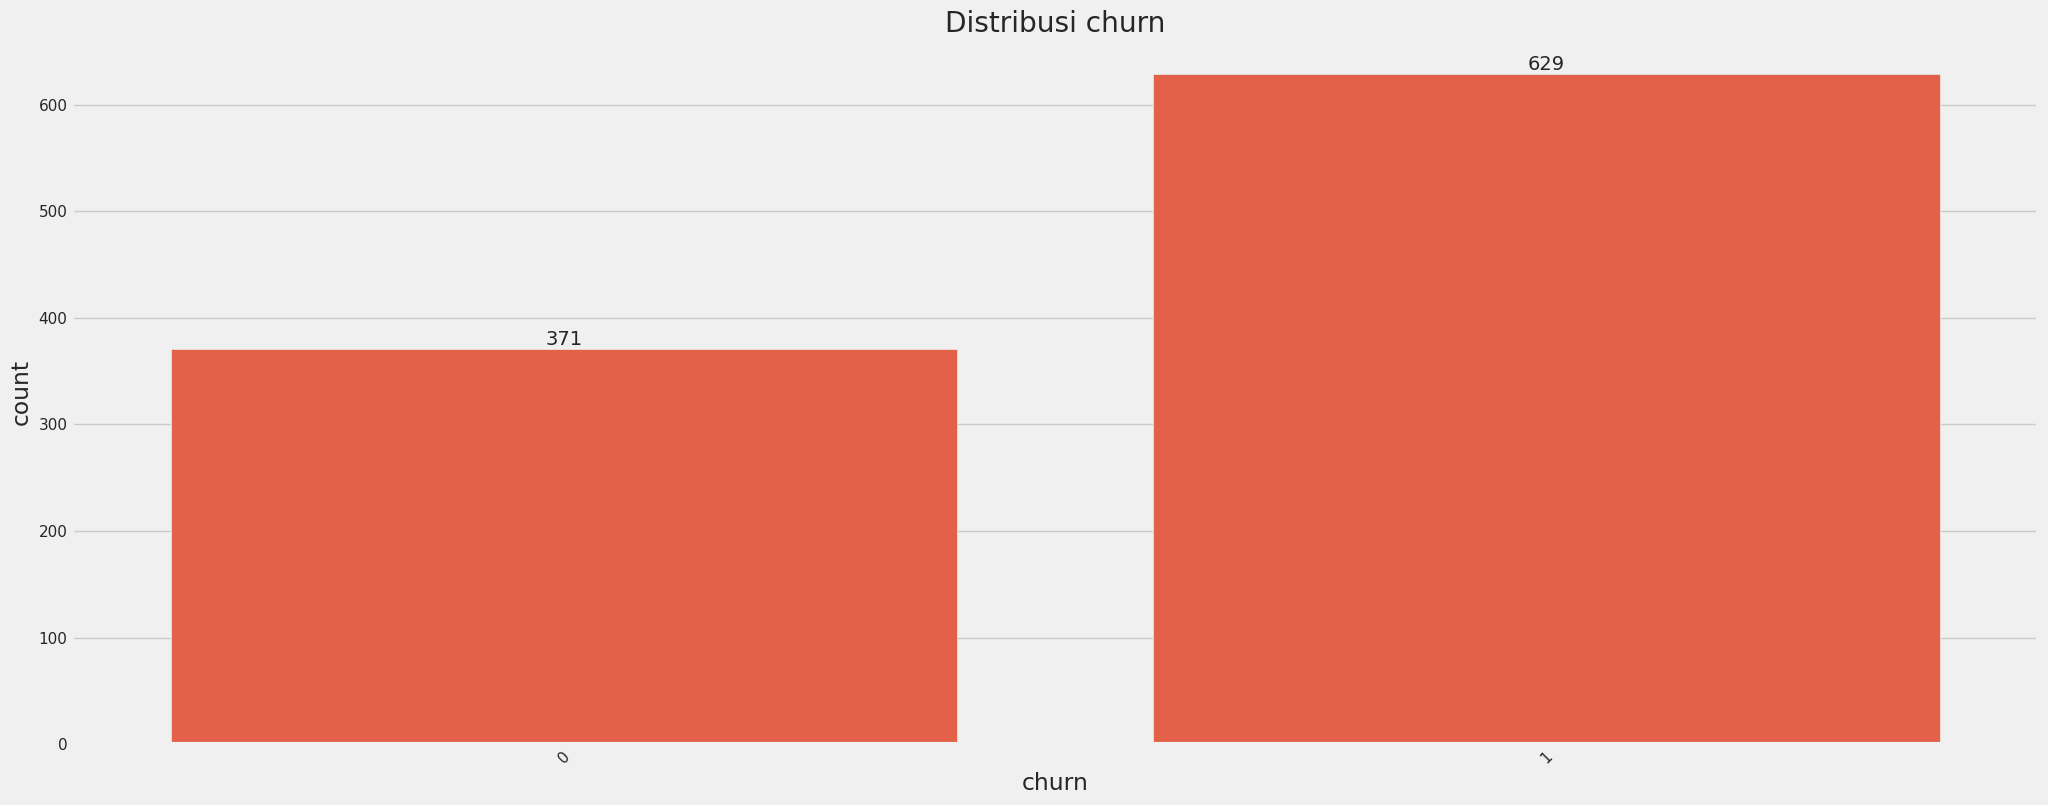

In [15]:
for col in cat_biasa:
    plt.figure()
    ax = sns.countplot(data=df, x=col)
    ax.bar_label(ax.containers[0])  # langsung munculin angka di atas bar
    sns.countplot(data=df, x=col)
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

1. Education
Distribusi cukup seimbang antara High School, Diploma, dan Bachelor, tapi Diploma punya jumlah paling banyak.

2. Work Location
Urban memiliki jumlah karyawan terbanyak, diikuti Suburban, dan paling sedikit Rural.

4. Gender
Male mendominasi jumlah karyawan secara signifikan dibanding Female (lebih dari dua kali lipat). Implikasi: Potensi bias gender dalam retensi dan rekrutmen. Perlu dicek apakah tingkat churn berbeda antara male dan female.

5. Marital Status
Single memiliki jumlah karyawan lebih banyak dibanding Married. Implikasi: Perbedaan status pernikahan bisa memengaruhi alasan resign, misalnya fleksibilitas kerja, lokasi, atau benefit.


## Multivariate Analysis

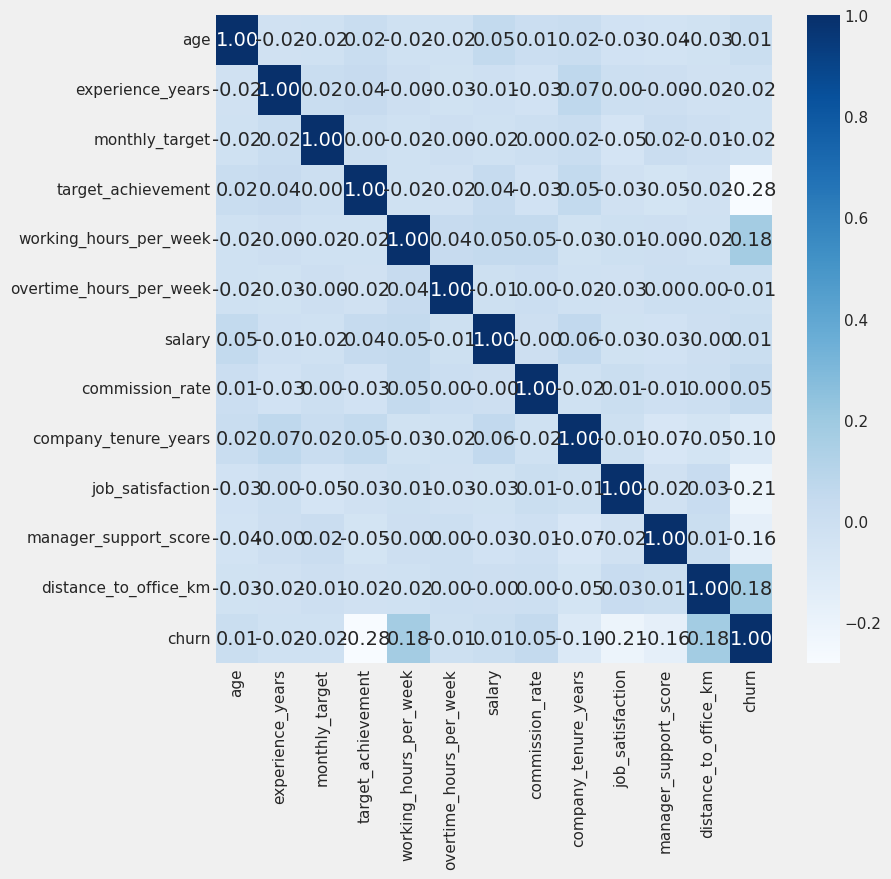

In [16]:
# Heat Map
plt.figure(figsize=(8, 8))
sns.heatmap(df[(nums)].corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

* Faktor terbesar penyebab churn di data ini adalah kinerja rendah (target achievement), kepuasan kerja rendah, dan dukungan manajer yang kurang.

* Faktor beban kerja & geografis seperti jam kerja tinggi dan jarak ke kantor jauh juga signifikan.

* Gaji & komisi tidak punya korelasi berarti (mendekati nol).

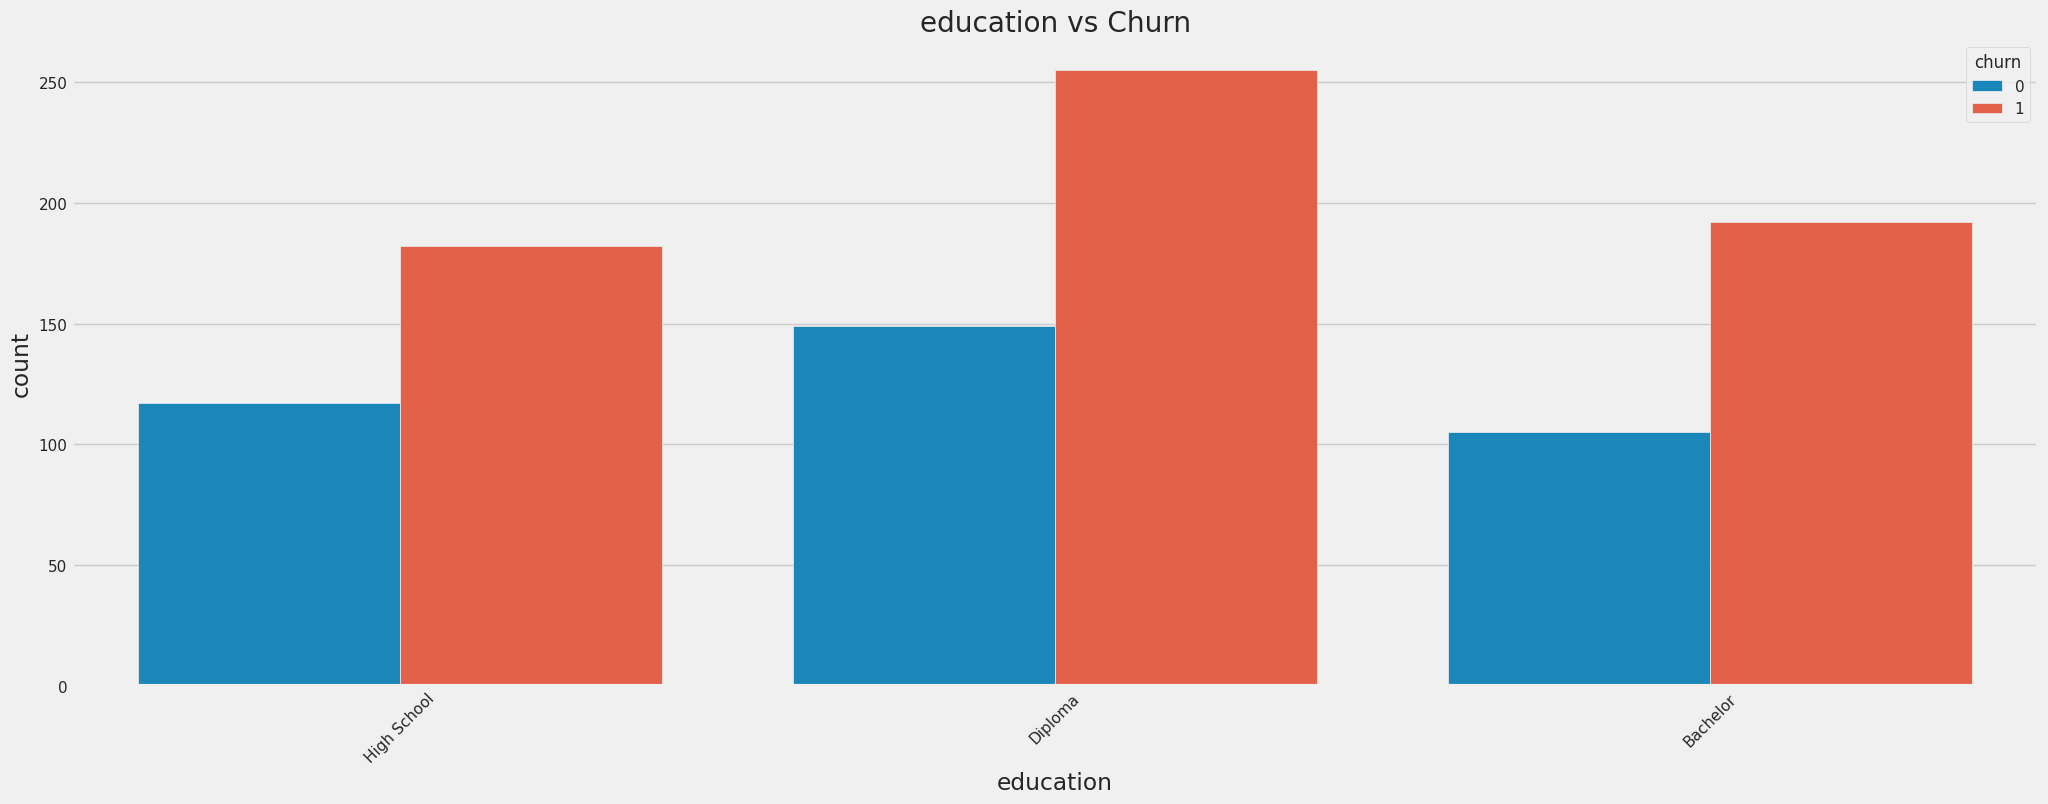

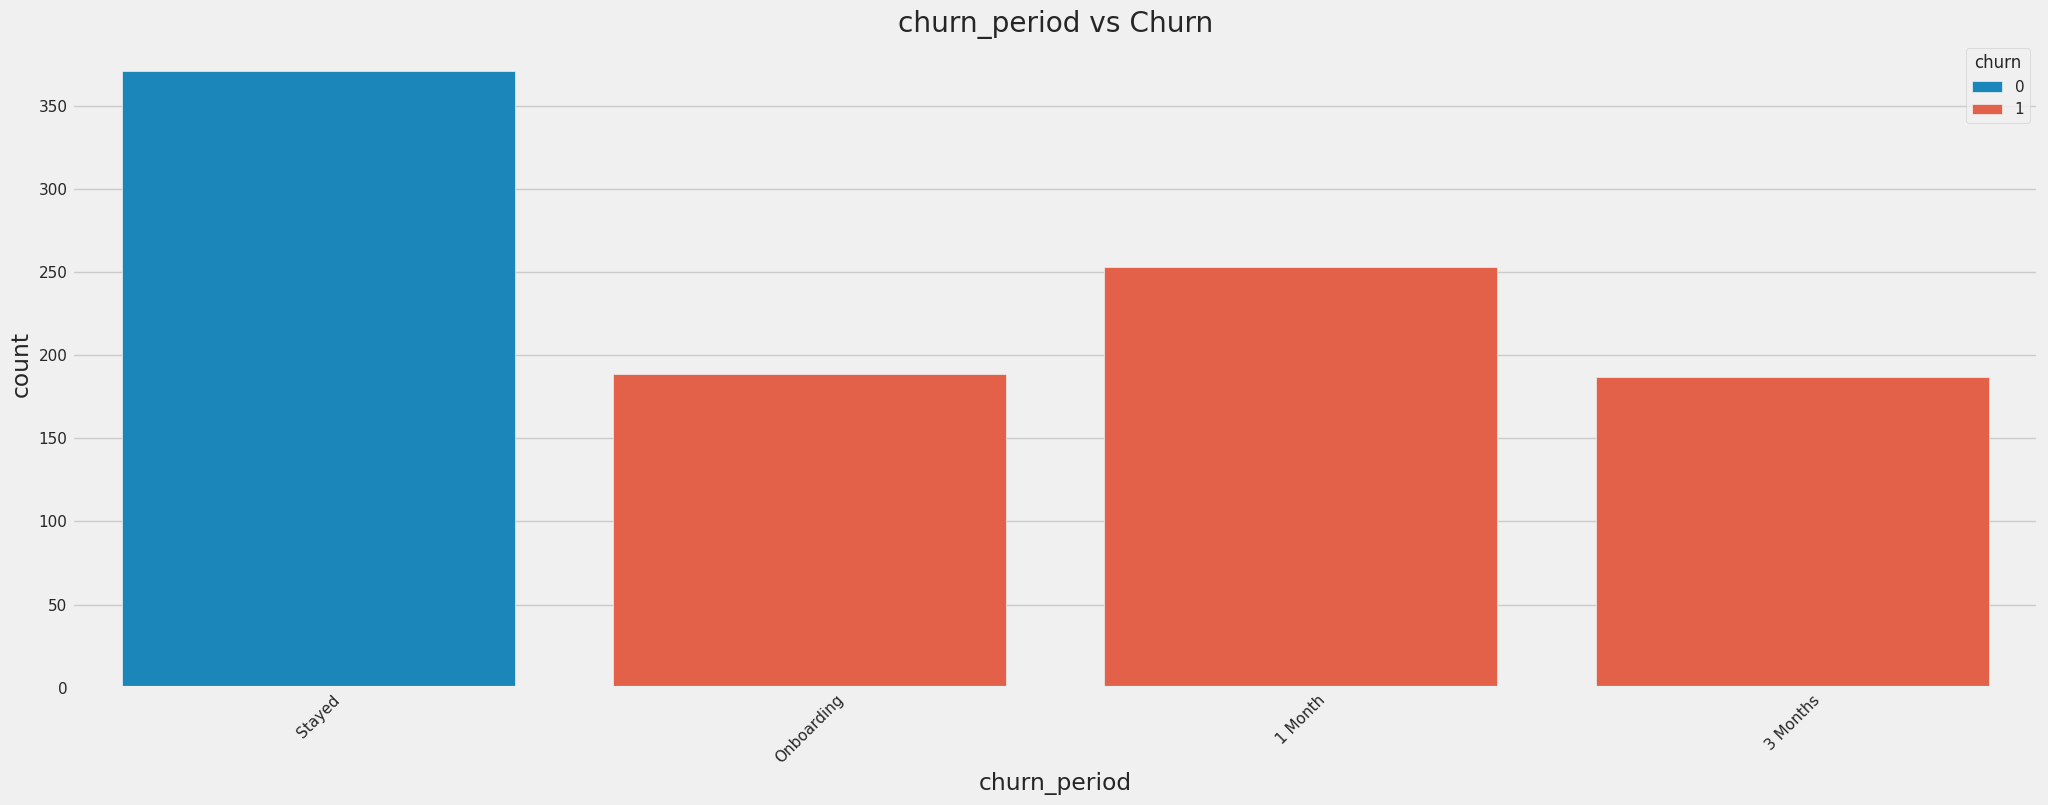

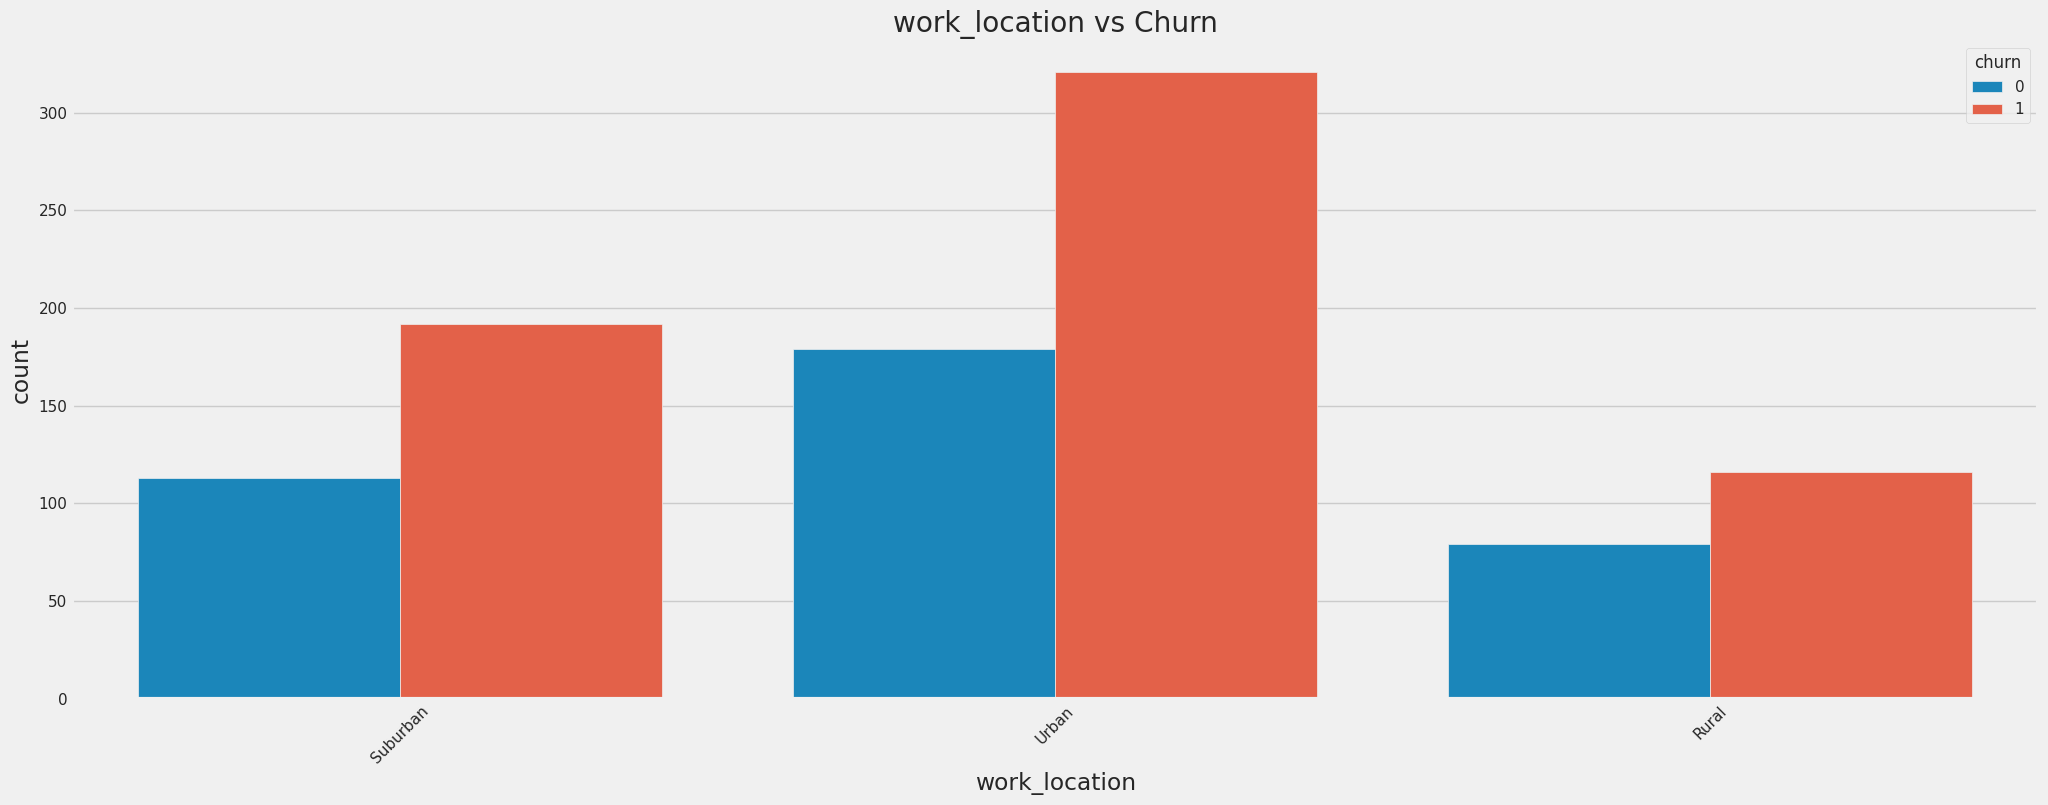

In [17]:
# === 3) MULTIVARIATE – KATEGORIKAL vs TARGET ===
for col in cat_bertingkat:
    plt.figure()
    sns.countplot(data=df, x=col, hue='churn')
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

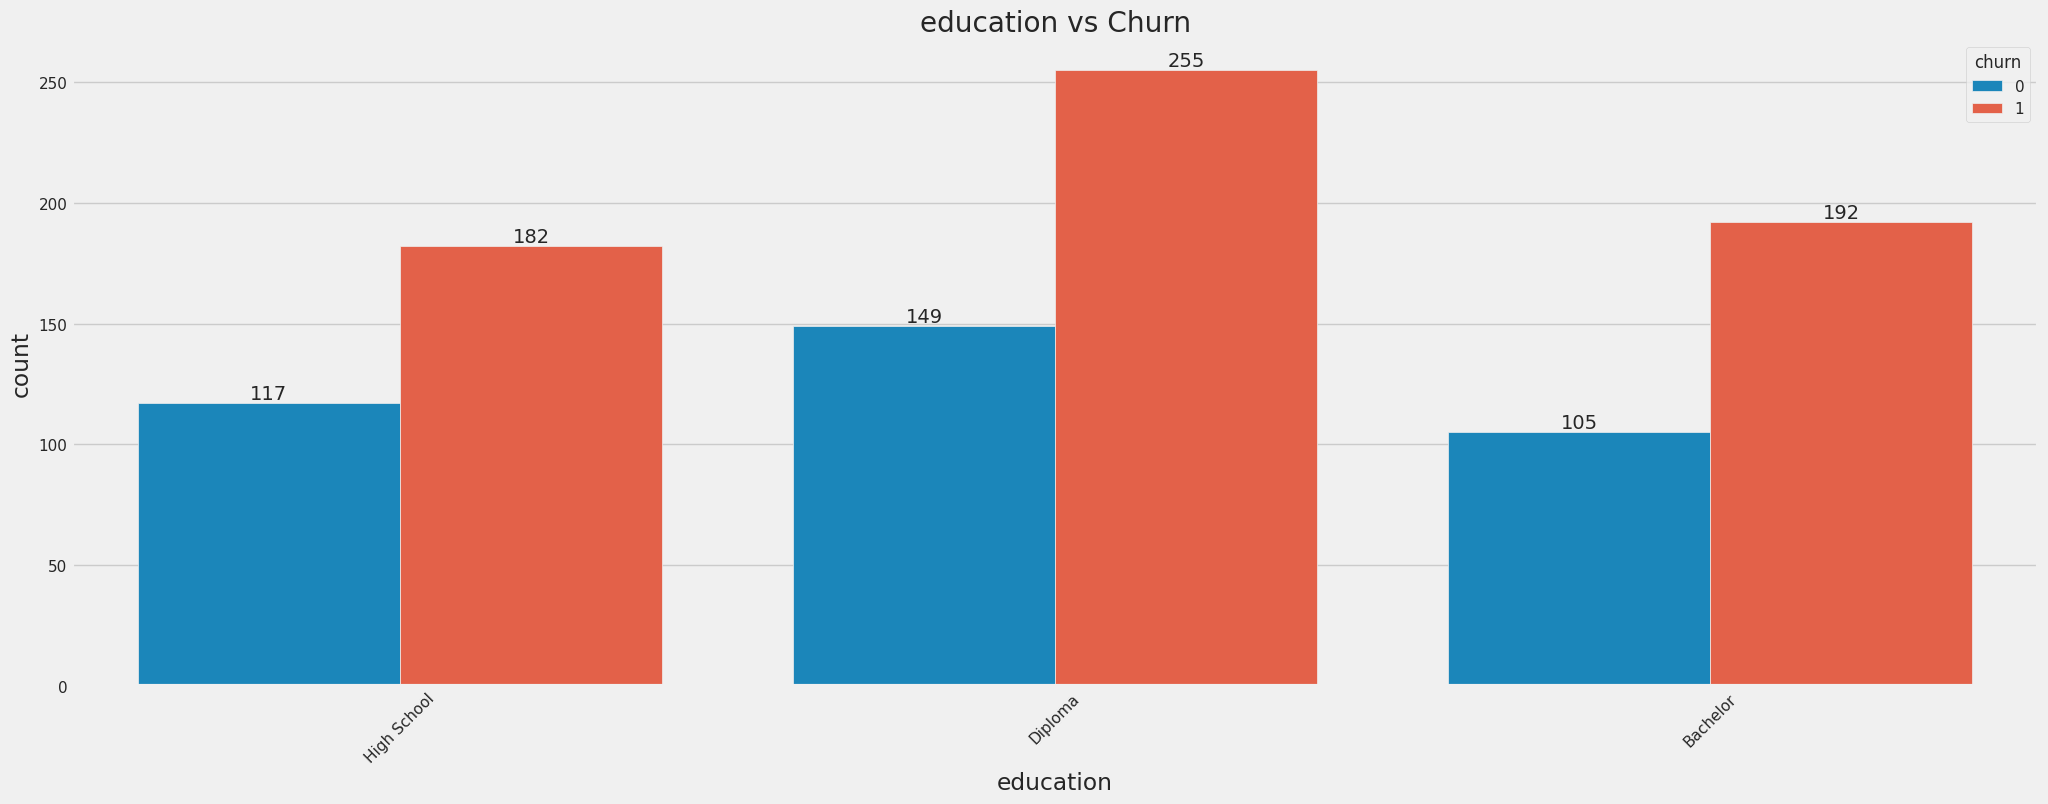

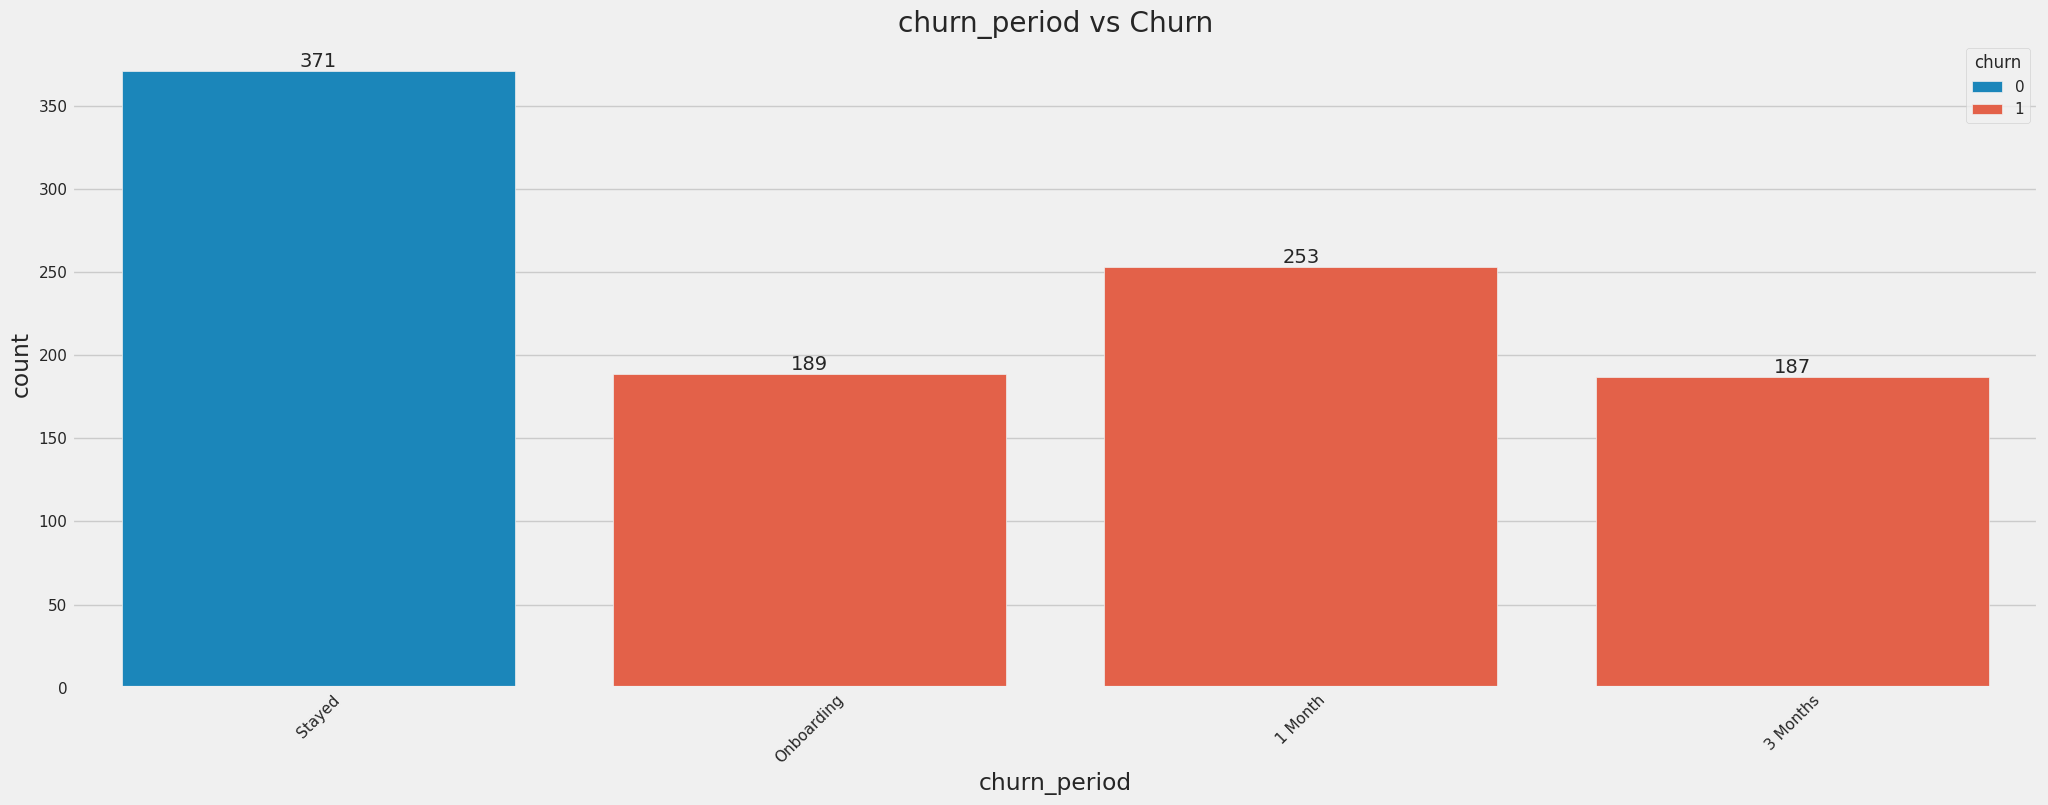

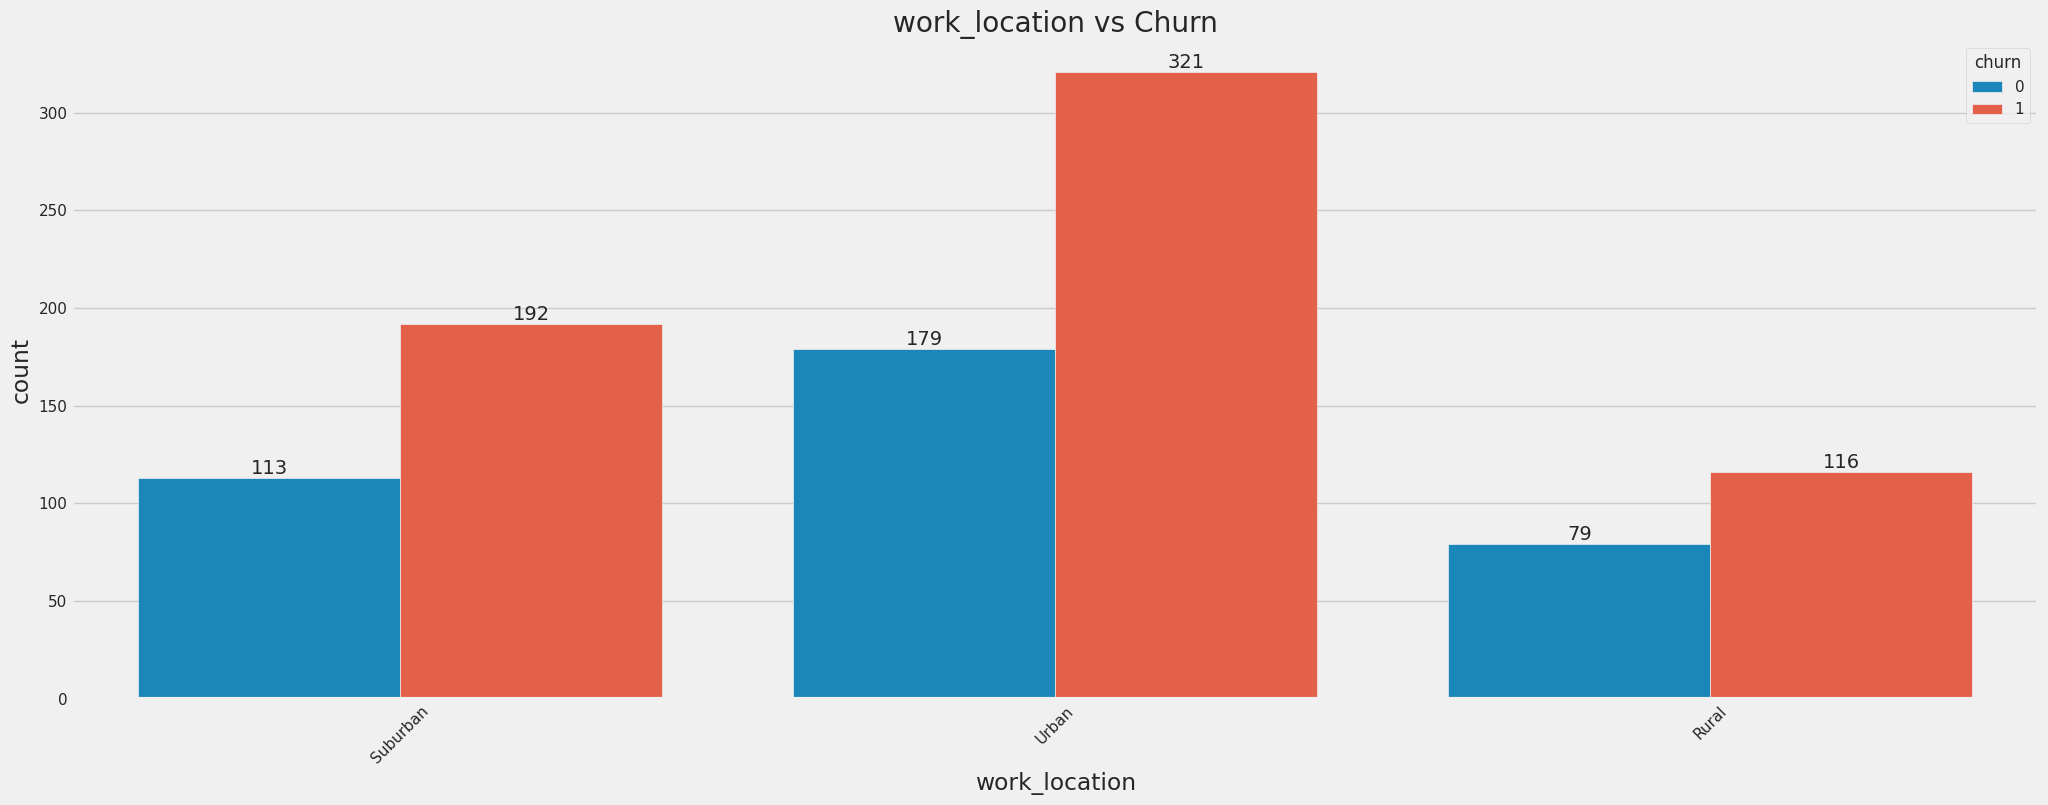

In [18]:
for col in cat_bertingkat:
    plt.figure()
    ax = sns.countplot(data=df, x=col, hue='churn')

    # Tambahin angka di atas semua bar
    for container in ax.containers:
        ax.bar_label(container)

    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<Figure size 1500x1500 with 0 Axes>

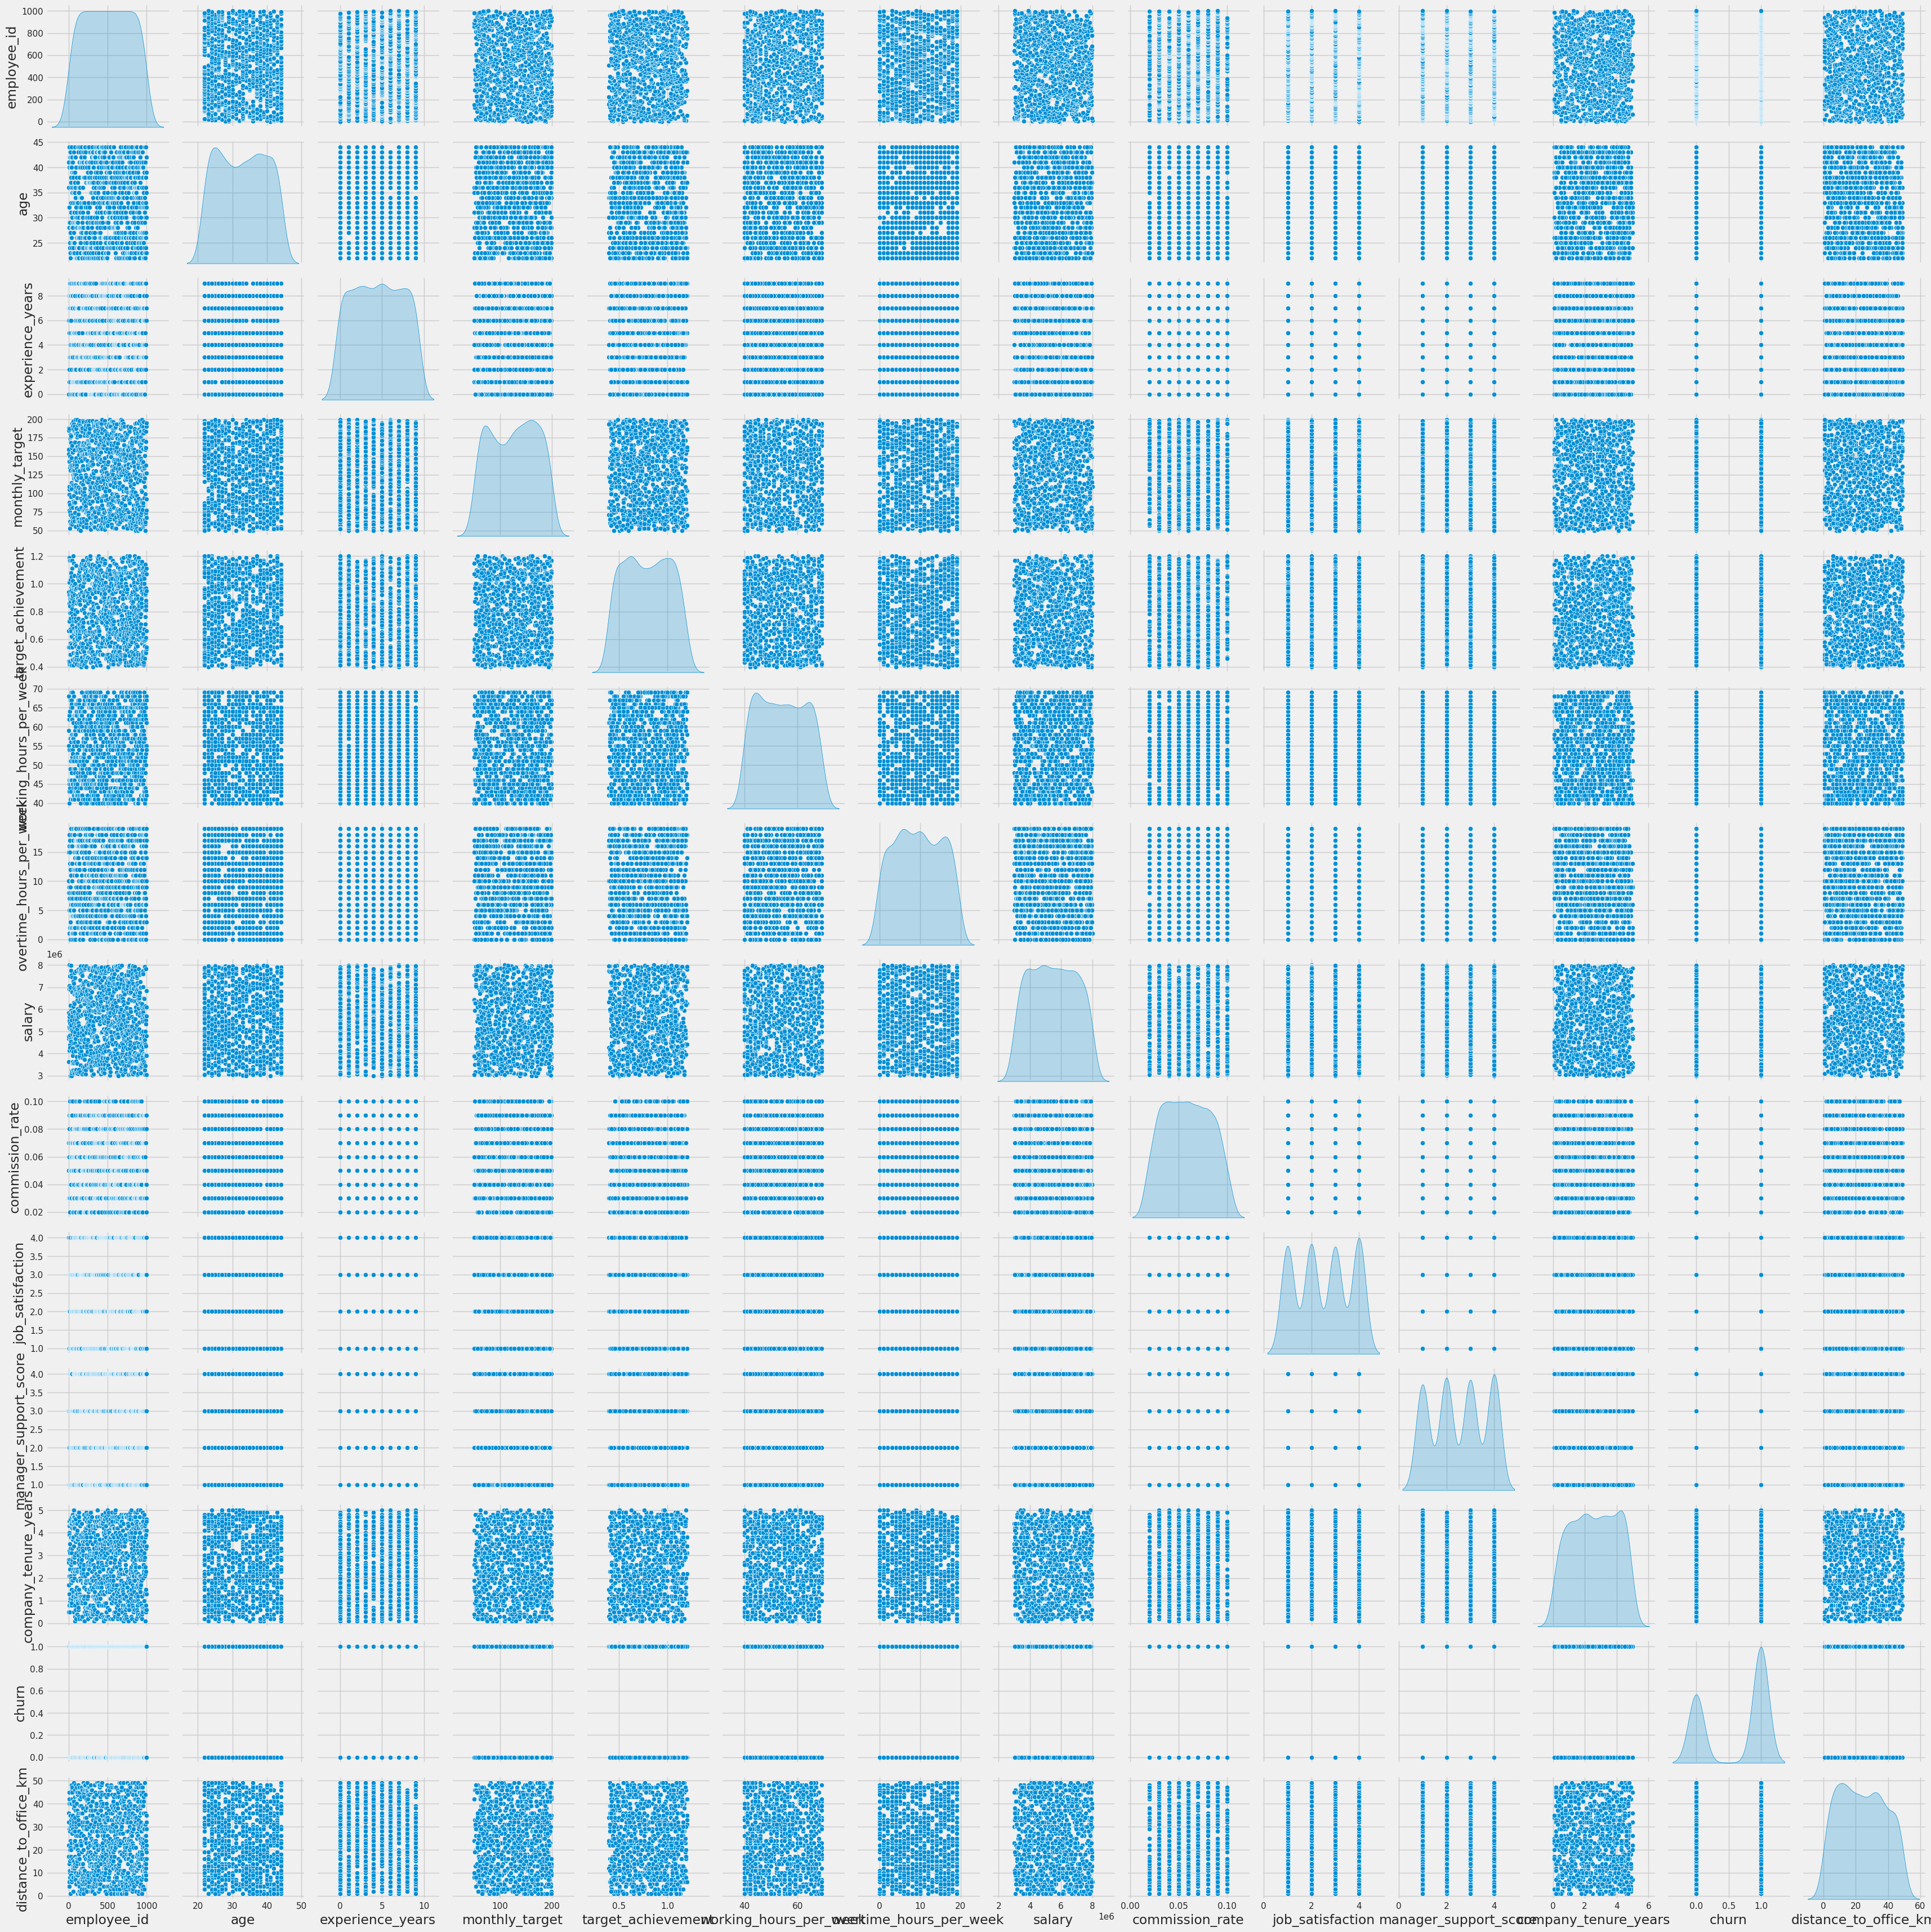

In [19]:
# Pair Plot
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')
plt.show()

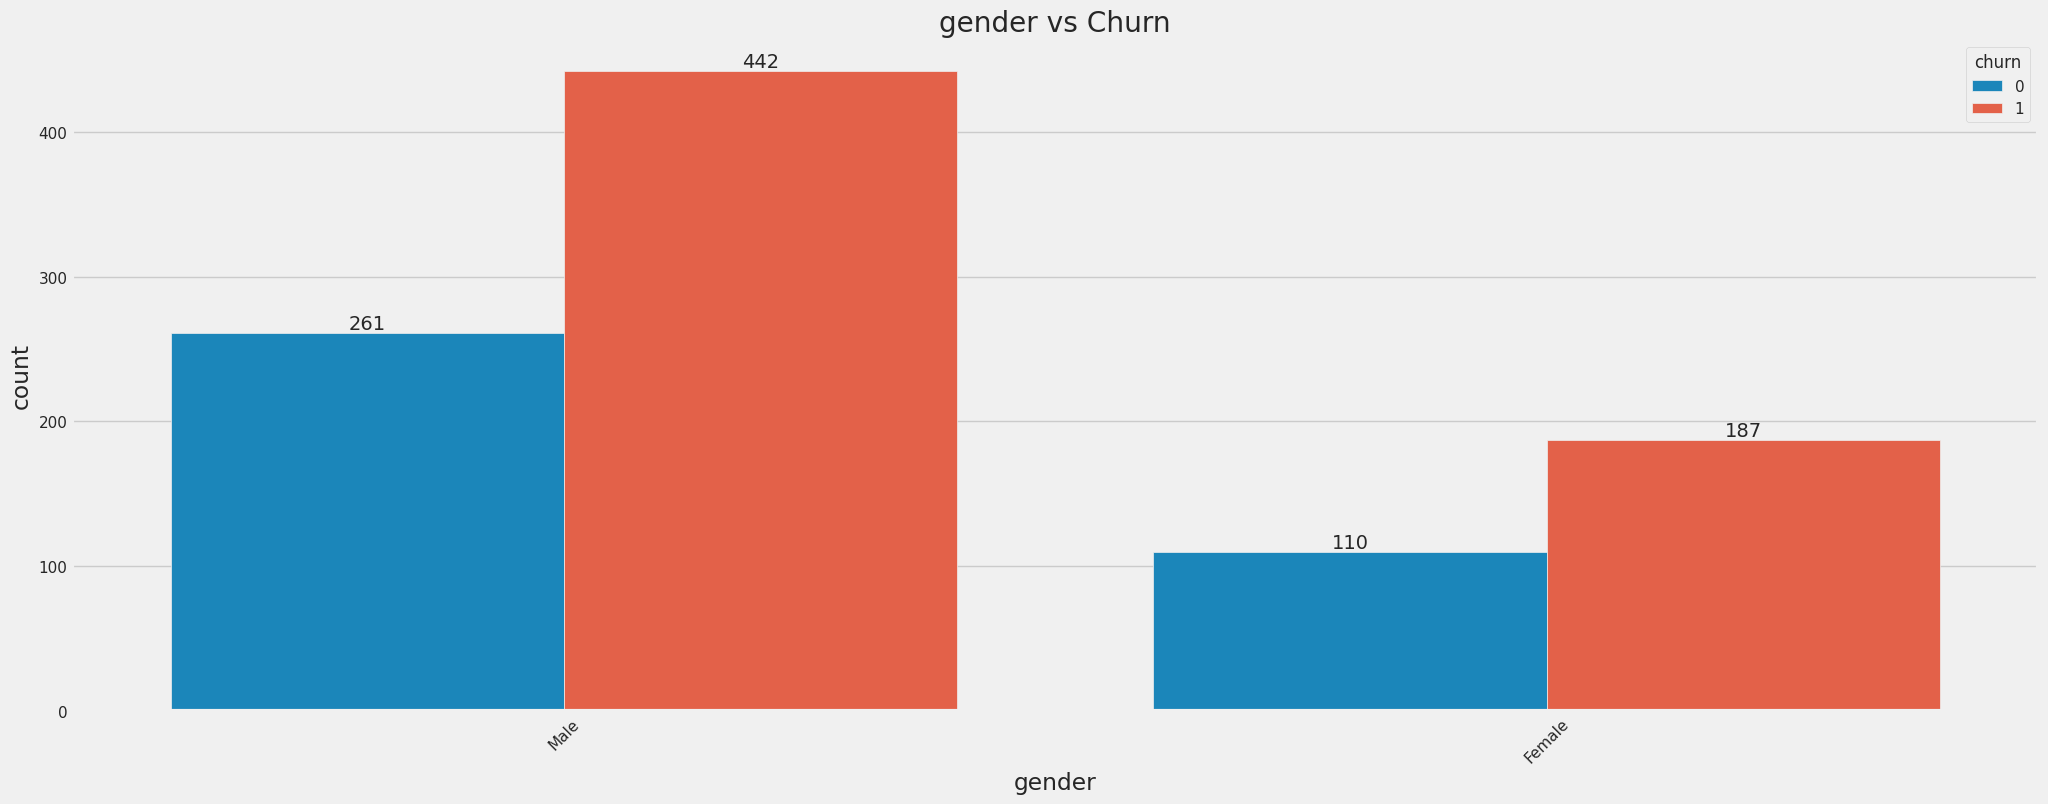

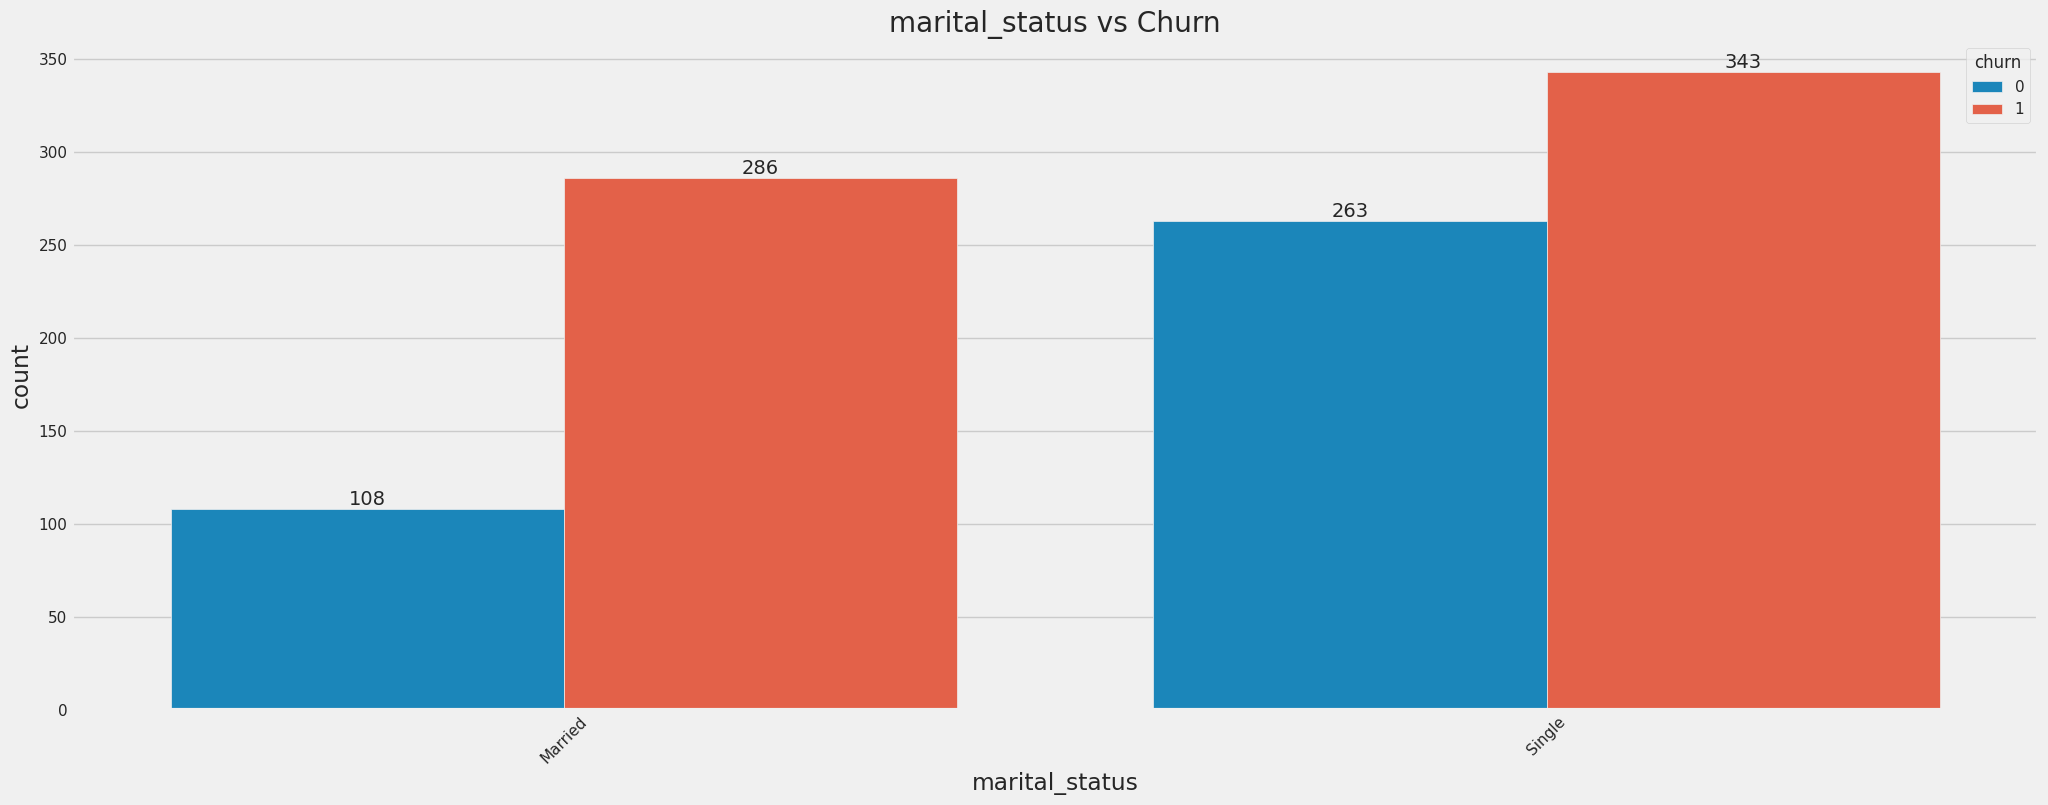

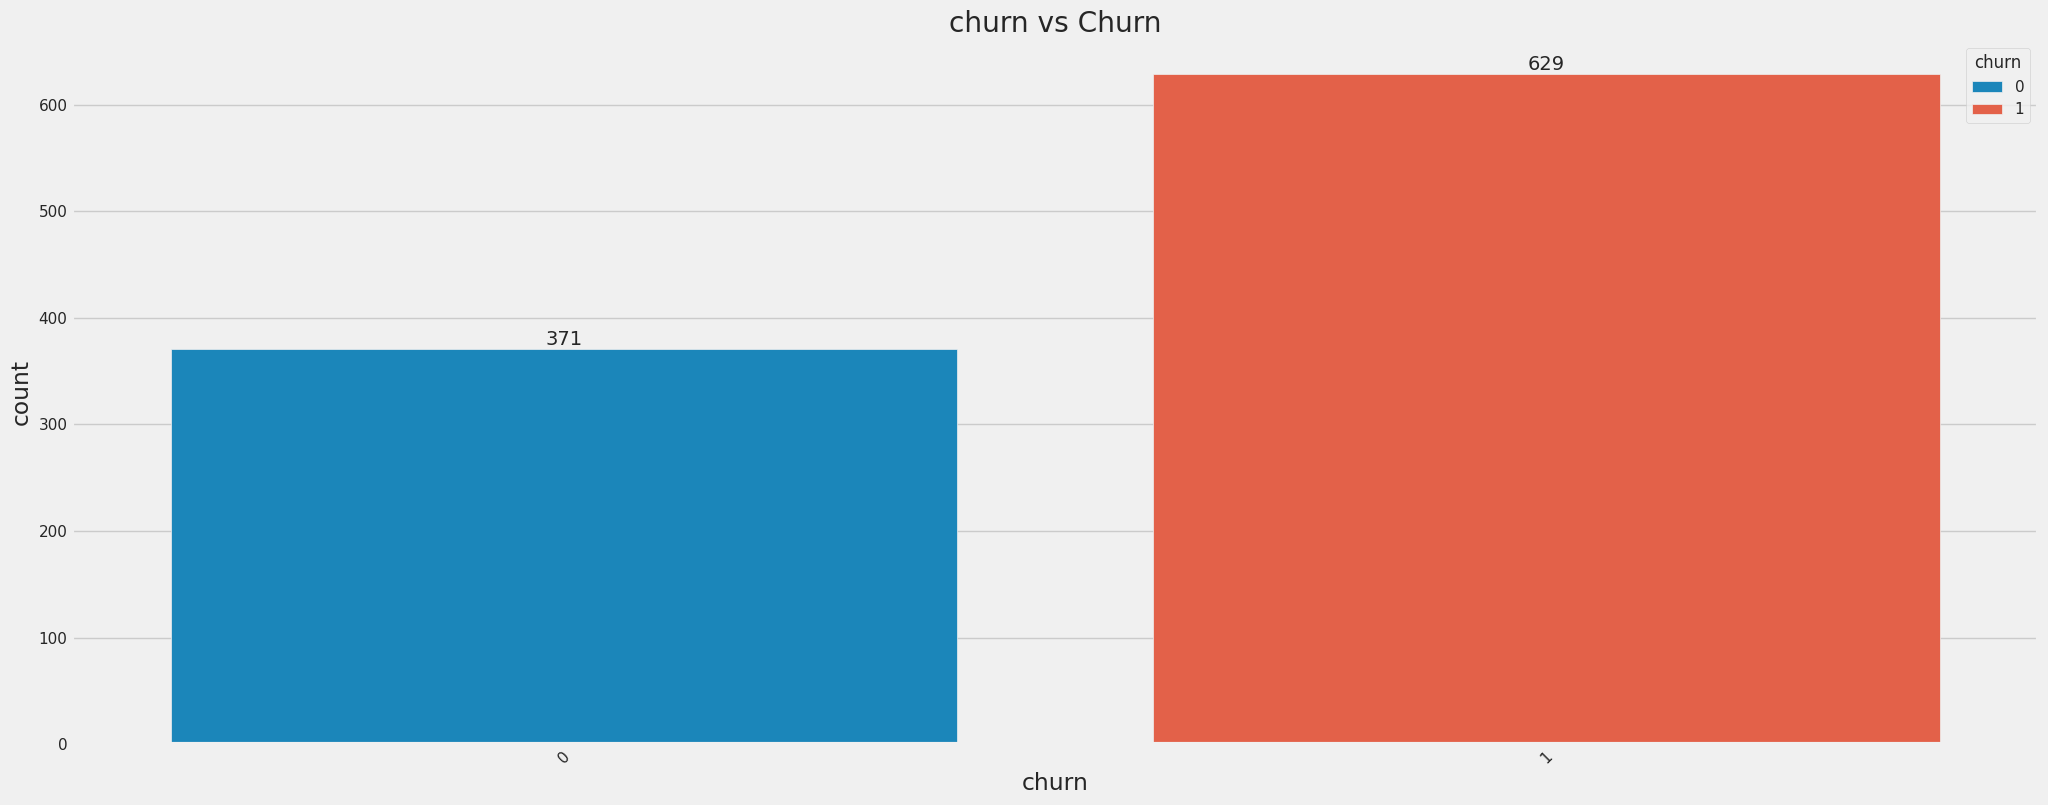

In [20]:
for col in cat_biasa:
    plt.figure()
    ax = sns.countplot(data=df, x=col, hue='churn')

    # Tambahin angka di atas semua bar
    for container in ax.containers:
        ax.bar_label(container)

    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


1. Education vs Churn
* High School → Proporsi karyawan yang churn cukup tinggi, walaupun ada juga yang bertahan.

* Diploma → Tingkat churn terlihat lebih tinggi dibandingkan yang bertahan, artinya lulusan Degree cenderung lebih sering keluar.

* Baachelor → Mirip dengan Degree, churn juga lebih dominan. Ini bisa menandakan ekspektasi karir/gaji yang lebih tinggi atau peluang kerja di luar yang lebih menarik.

* Latar belakang pendidikan yang lebih tinggi belum tentu membuat retensi lebih baik. Perlu strategi khusus untuk menjaga talenta dengan kualifikasi tinggi, seperti jalur karir jelas atau program pengembangan.
<br>

2. Churn Period vs Churn
* Churn paling besar terjadi pada 1 month dan 3 months pertama.

* Stayed didominasi oleh karyawan yang tidak churn sama sekali.

* Banyak churn di periode onboarding, yang menandakan masalah adaptasi di awal kerja.

* Interpretasi bisnis: Perlu peningkatan kualitas onboarding, mentoring awal, dan komunikasi ekspektasi kerja sejak awal untuk mengurangi churn di 3 bulan pertama.
<br>

3. Work Location vs Churn
* Urban → Churn sangat tinggi, kemungkinan karena peluang kerja lain lebih mudah diakses.

* Suburban dan Rural → Masih churn, tapi lebih sedikit dibandingkan Urban.

* Interpretasi bisnis: Karyawan di area urban lebih “mobile” dan mudah pindah kerja. Strategi retensi di kota besar perlu lebih kompetitif (benefit, fleksibilitas, gaji).
<br>

4. Gender vs Churn
* Male → Churn jauh lebih tinggi dibanding bertahan.

* Female → Churn juga tinggi, tapi jumlahnya tidak sebesar male.

* Interpretasi bisnis: Perlu melihat faktor lain yang mungkin memengaruhi churn laki-laki (beban kerja, jenis pekerjaan, peluang di luar).
<br>

5. Marital Status vs Churn
* Married → Churn tinggi, bahkan lebih tinggi dari yang bertahan.

* Single → Churn juga tinggi, tapi distribusi lebih seimbang dengan yang bertahan.

* Interpretasi bisnis: Status menikah tidak menjamin retensi. Perlu analisis faktor eksternal (misal lokasi kerja jauh dari rumah atau fleksibilitas waktu kerja).

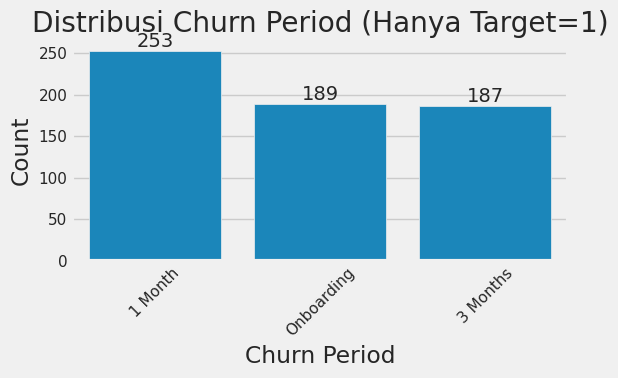

In [21]:
# === 4) ANALISIS KHUSUS TARGET=1 vs CHURN PERIOD ===
import seaborn as sns
import matplotlib.pyplot as plt

# Subset hanya karyawan yang churn
df_churned = df[df['churn'] == 1]

# Distribusi churn_period (hanya churn=1)
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_churned, x='churn_period', order=df_churned['churn_period'].value_counts().index)

# Tambahin angka di atas semua bar
for container in ax.containers:
    ax.bar_label(container)

plt.title("Distribusi Churn Period (Hanya Target=1)")
plt.xlabel("Churn Period")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Berdasarkan grafik distribusi churn_period untuk karyawan yang churn (target=1):

* Puncak churn terjadi pada bulan pertama bekerja dengan jumlah kasus paling tinggi dibandingkan periode onboarding maupun 3 bulan.

* Churn pada periode onboarding dan 3 bulan hampir sama jumlahnya, tapi sedikit lebih rendah daripada churn di bulan pertama.

* Pola ini menunjukkan bahwa masa-masa kritis retensi karyawan adalah 1–3 bulan pertama, dengan risiko terbesar pada bulan pertama setelah melewati masa onboarding.

💡 Interpretasi bisnis:

* Perusahaan perlu memperkuat program pendampingan dan engagement khusus di bulan pertama kerja.

* Evaluasi penyebab churn pasca-onboarding, seperti ketidaksesuaian ekspektasi kerja, beban kerja awal, atau kurangnya dukungan dari atasan.

* Menerapkan check-in rutin (misalnya, weekly feedback session) pada 1–3 bulan awal bisa membantu mengidentifikasi masalah sebelum karyawan memutuskan keluar.

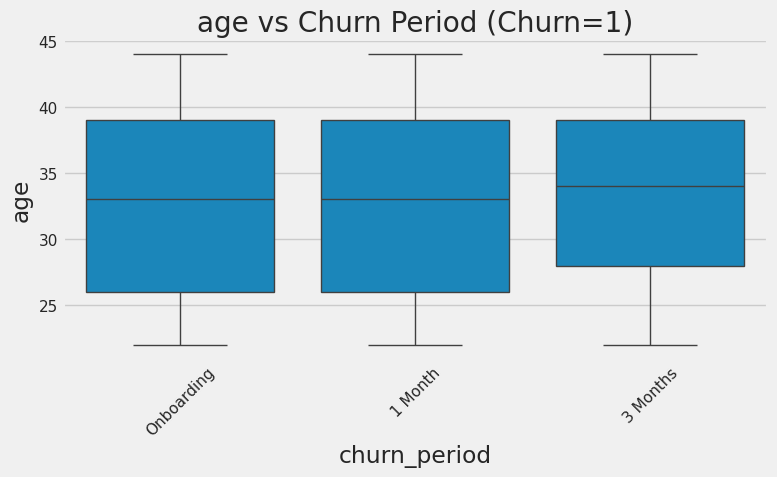

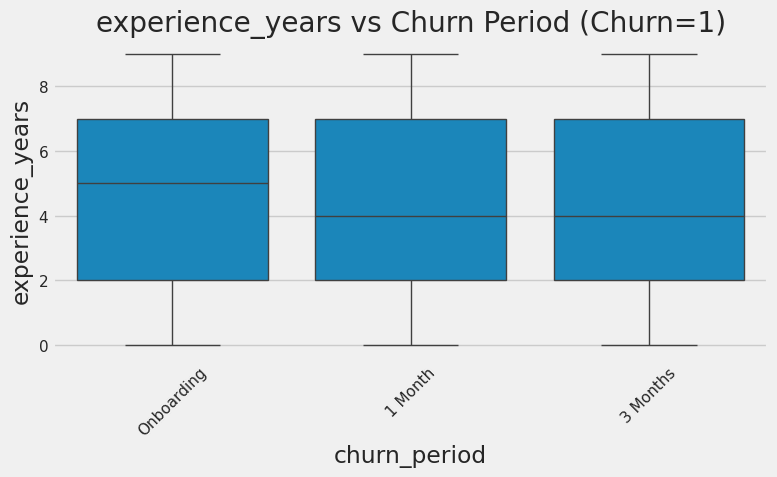

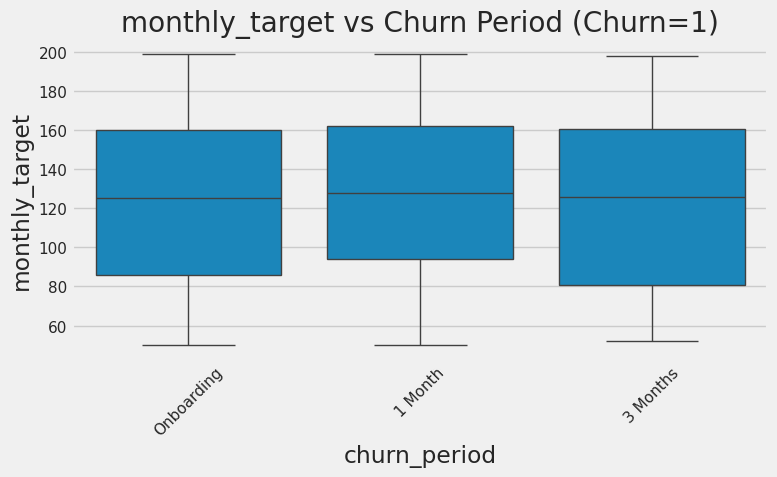

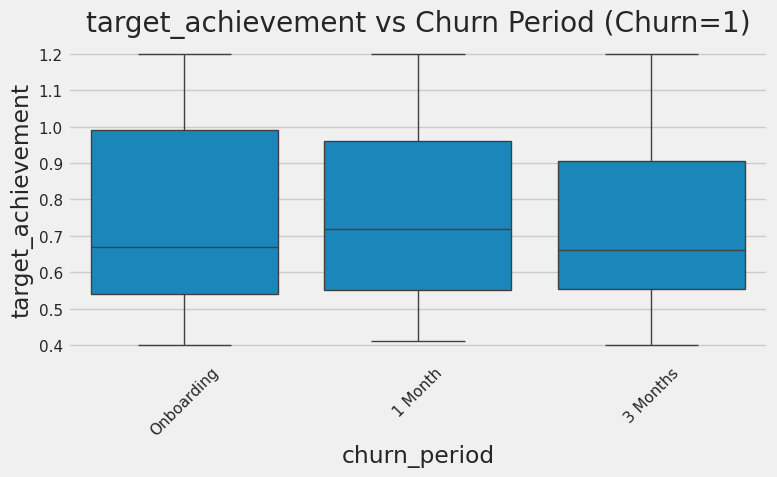

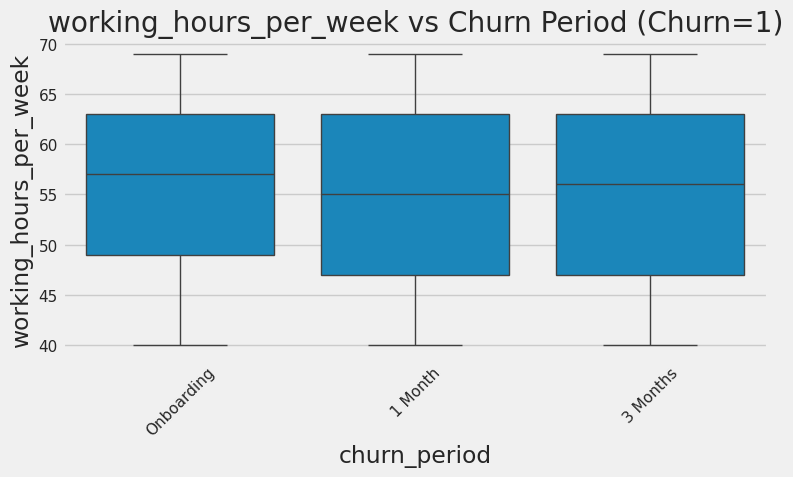

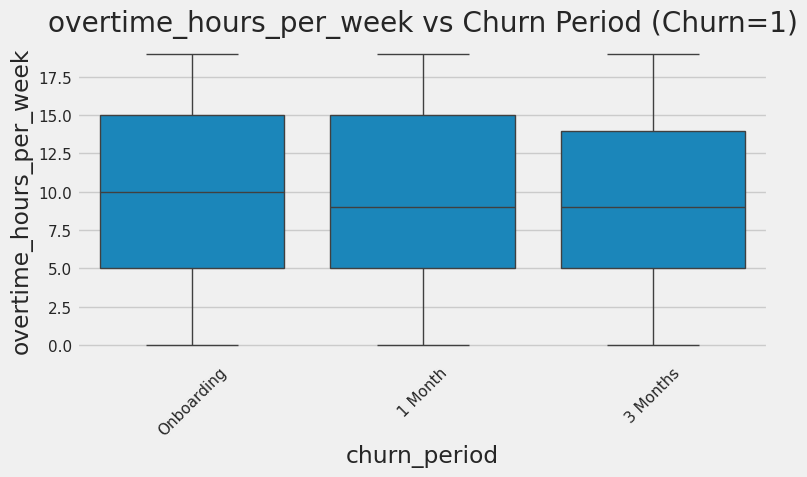

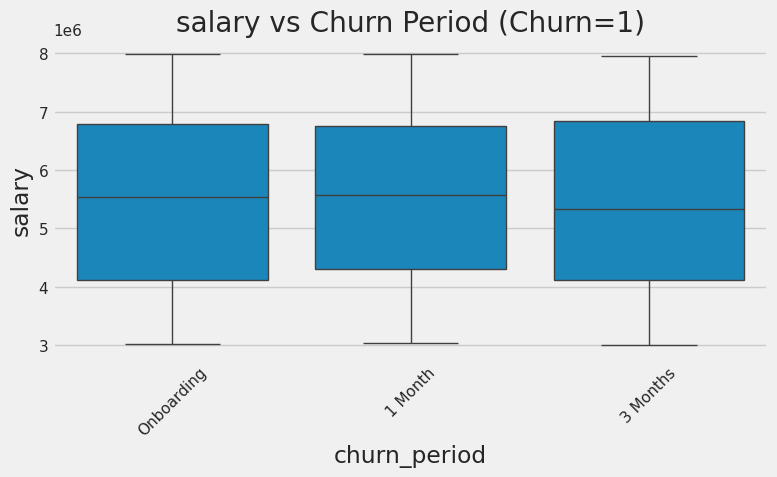

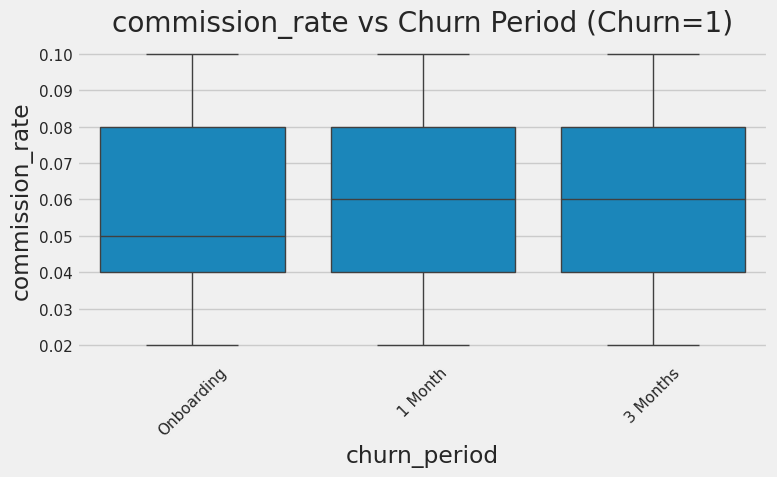

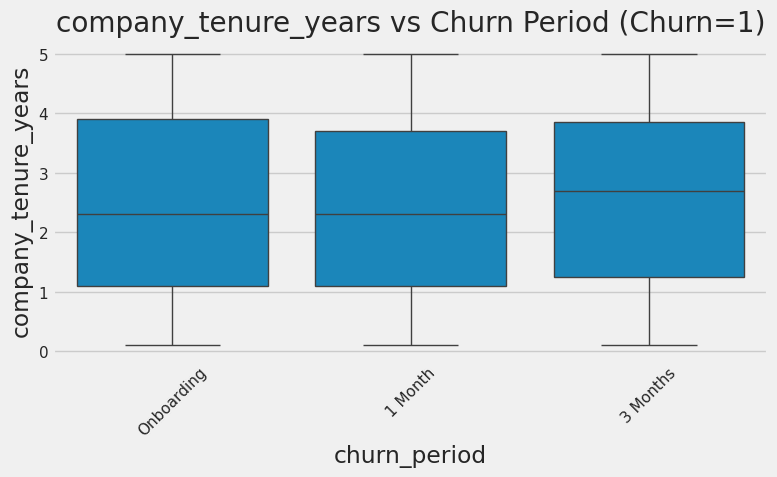

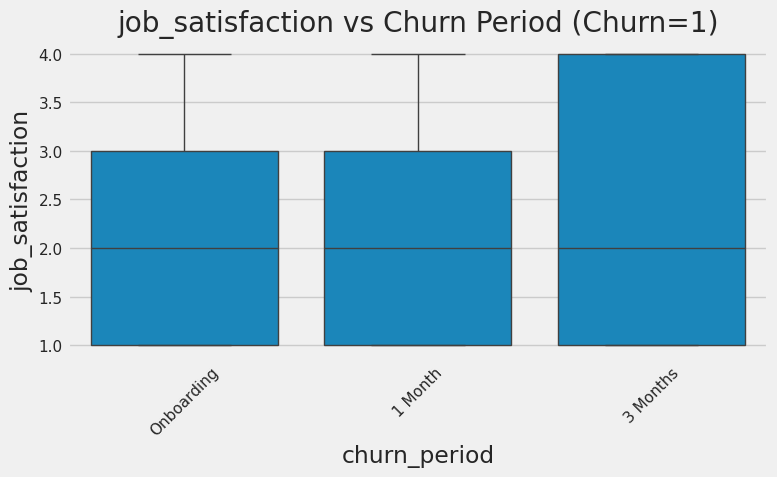

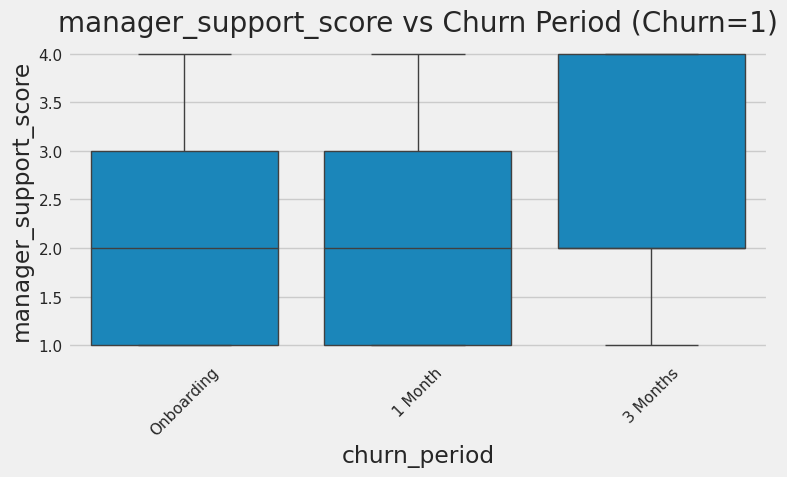

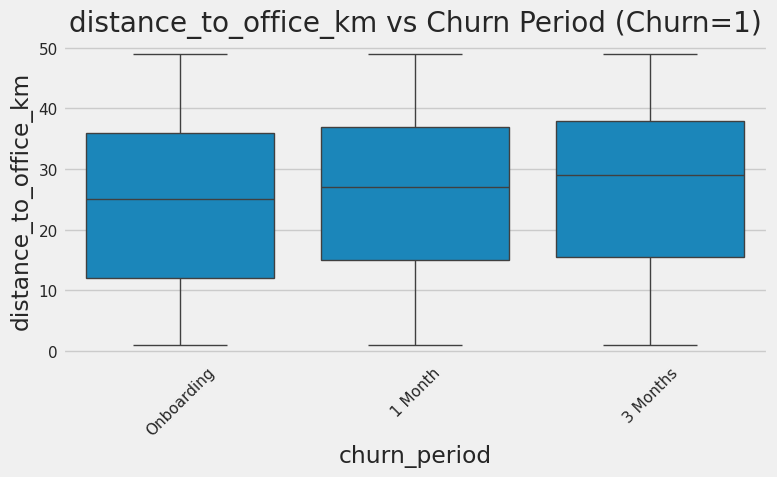

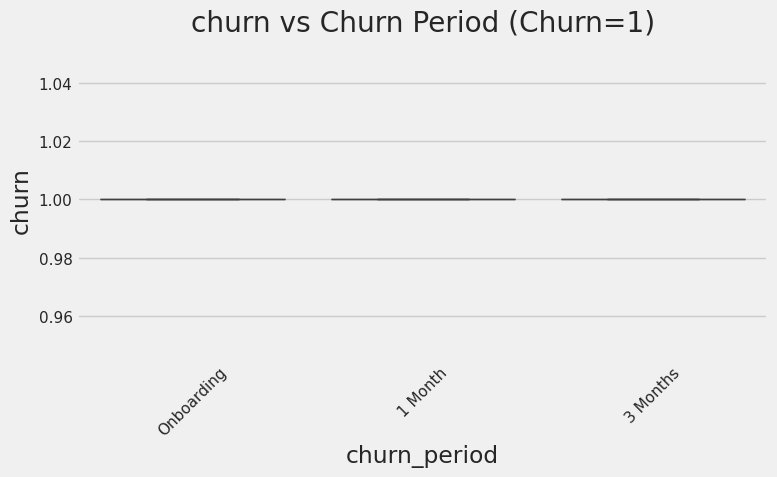

In [22]:
# === Analisis semua fitur numerik vs churn_period (khusus churn=1) ===
for col in nums:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_churned, x='churn_period', y=col)
    plt.title(f"{col} vs Churn Period (Churn=1)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


1. Age vs Churn Period
* Median usia untuk semua kategori churn period relatif mirip (sekitar 33–34 tahun).

* Tidak terlihat perbedaan mencolok antara karyawan yang churn di fase Onboarding, 1 Month, atau 3 Months.

* Hal ini mengindikasikan bahwa faktor usia tidak menjadi pendorong utama kapan seorang karyawan memutuskan untuk keluar di periode awal.
<br>

2. Experience Years vs Churn Period
* Median pengalaman kerja juga konsisten di semua kategori churn period (sekitar 5 tahun).

* Sebagian besar karyawan yang churn, baik di onboarding maupun bulan ke-1 dan ke-3, memiliki latar belakang pengalaman yang cukup beragam (0–9 tahun).

* Artinya, tingkat pengalaman kerja sebelumnya tidak secara signifikan mempengaruhi kecepatan mereka keluar di periode awal.
<br>

3. Monthly Target vs Churn Period
* Median target bulanan hampir sama di semua kategori churn (sekitar 125–130 unit/poin).

* Penyebaran target terlihat lebar, tetapi tidak ada indikasi bahwa target bulanan yang lebih tinggi berkorelasi langsung dengan churn lebih cepat.

* Ini mengisyaratkan bahwa target kerja mungkin bukan faktor utama penentu kapan seseorang resign di periode awal, atau ada faktor lain yang lebih dominan (misalnya job satisfaction, work environment).
<br>

4. Target Achievement vs Churn Period
* Median pencapaian target serupa di semua kategori churn (sekitar 0,7 atau 70%).

* Karyawan yang churn pada 3 Months cenderung memiliki median target achievement sedikit lebih rendah dibanding Onboarding dan 1 Month.

* Hal ini mengindikasikan bahwa meskipun pencapaian target berperan, perbedaannya tidak terlalu signifikan dalam memengaruhi cepat atau lambatnya karyawan resign di awal masa kerja.
<br>

5. Working Hours per Week vs Churn Period
* Median jam kerja mingguan di semua kategori churn berada di kisaran ±55–57 jam.

* Tidak ada perbedaan berarti antara mereka yang keluar di Onboarding, 1 Month, maupun 3 Months.

* Ini mengindikasikan bahwa jumlah jam kerja normal mingguan tidak terlalu menentukan kapan mereka keluar, atau ada faktor lain seperti beban mental/lingkungan kerja yang lebih berpengaruh.
<br>

6. Overtime Hours per Week vs Churn Period
* Median jam lembur di semua kategori churn berada di kisaran ±8–9 jam per minggu.

* Pola overtime relatif konsisten, tetapi ada sedikit indikasi bahwa mereka yang churn di 3 Months cenderung memiliki median lembur sedikit lebih rendah.

* Artinya, lembur bukan faktor pembeda kuat antara periode churn yang berbeda, namun bisa saja terkait dengan beban kerja atau job satisfaction secara keseluruhan.
<br>

7. Salary vs Churn Period
* Median gaji relatif sama di semua periode churn (sekitar 5,3–5,5 juta).

* Tidak ada perbedaan signifikan antara mereka yang keluar di Onboarding, 1 Month, maupun 3 Months.

* Ini mengindikasikan gaji awal bukan faktor pembeda utama kapan karyawan memutuskan resign di awal masa kerja.
<br>

8. Commission Rate vs Churn Period
* Median commission rate stabil di kisaran ±0,06 (6%) pada semua kategori churn.

* Rentang distribusi relatif sama, menunjukkan komisi tidak mempengaruhi secara langsung waktu terjadinya churn.
<br>

9. Company Tenure Years vs Churn Period
* Median masa kerja sebelumnya di semua kategori churn sekitar 2 tahun.

* Polanya konsisten, artinya pengalaman lama/baru di perusahaan tidak berhubungan langsung dengan apakah karyawan keluar saat onboarding, bulan pertama, atau bulan ketiga.
<br>

10. Job Satisfaction vs Churn Period
* Median kepuasan kerja relatif rendah di semua periode churn (sekitar skor 2 dari 4).

* Artinya, baik mereka yang resign saat onboarding, bulan pertama, maupun bulan ketiga cenderung sudah merasa kurang puas sejak awal.

* Faktor kepuasan kerja kemungkinan sudah menjadi masalah sejak awal masa kerja, bukan berkembang seiring waktu.
<br>

11. Manager Support Score vs Churn Period
* Median dukungan dari manajer juga konsisten rendah (sekitar skor 2 dari 4) di semua periode churn.

* Ini menunjukkan lemahnya support manajerial berpotensi menjadi faktor konstan yang mempengaruhi keputusan resign di tiga fase awal tersebut.
<br>

12. Distance to Office (km) vs Churn Period
* Median jarak rumah ke kantor berada di kisaran ±25–27 km untuk semua kategori churn.

* Jarak yang cukup jauh ini bisa berkontribusi pada churn, namun karena distribusinya seragam di semua periode, jarak tidak menjadi pembeda utama kapan resign terjadi.

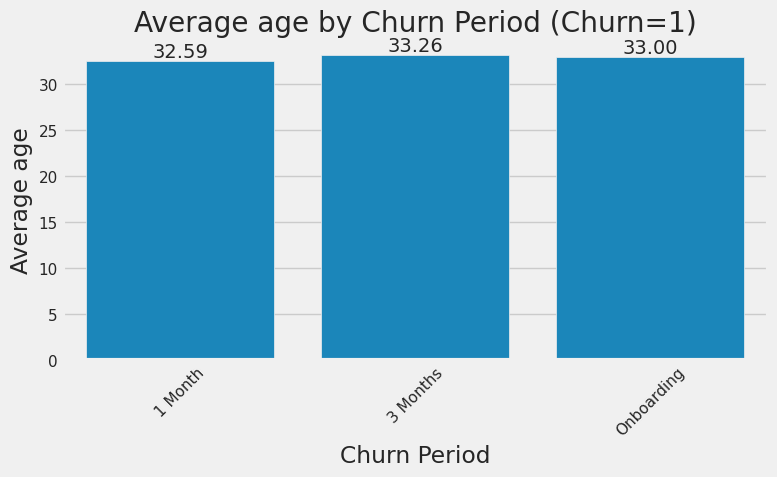

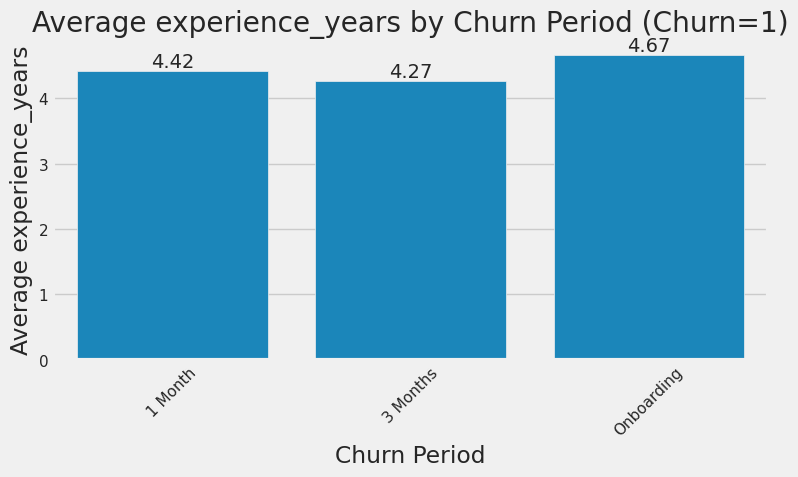

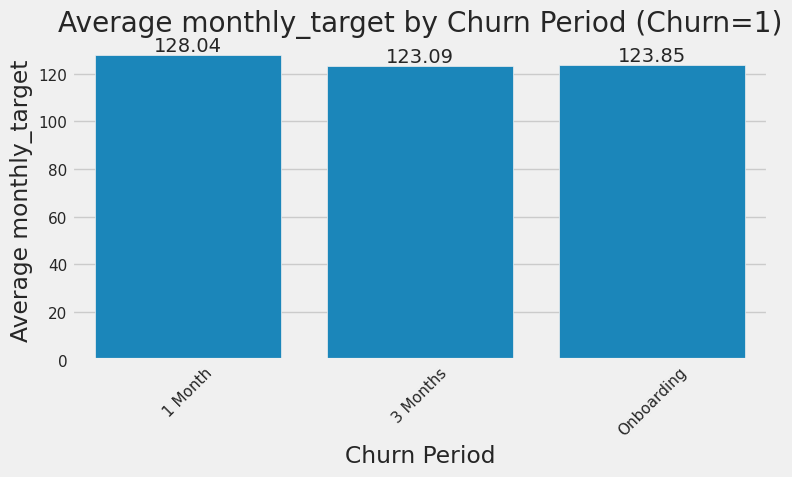

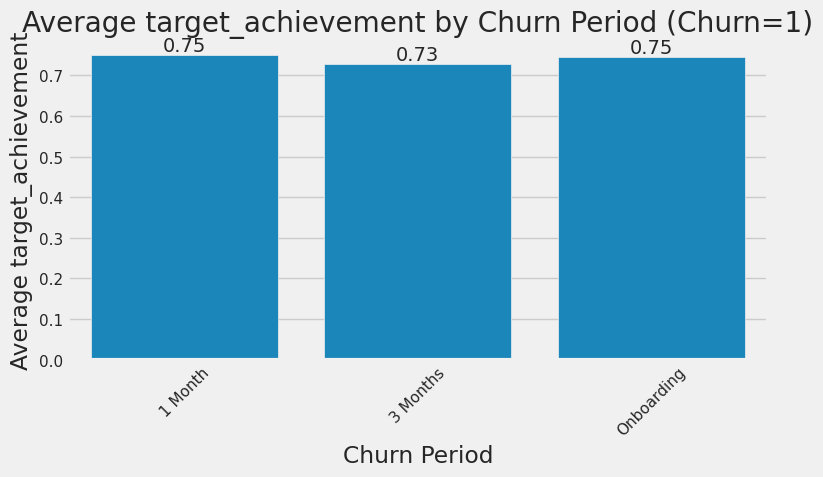

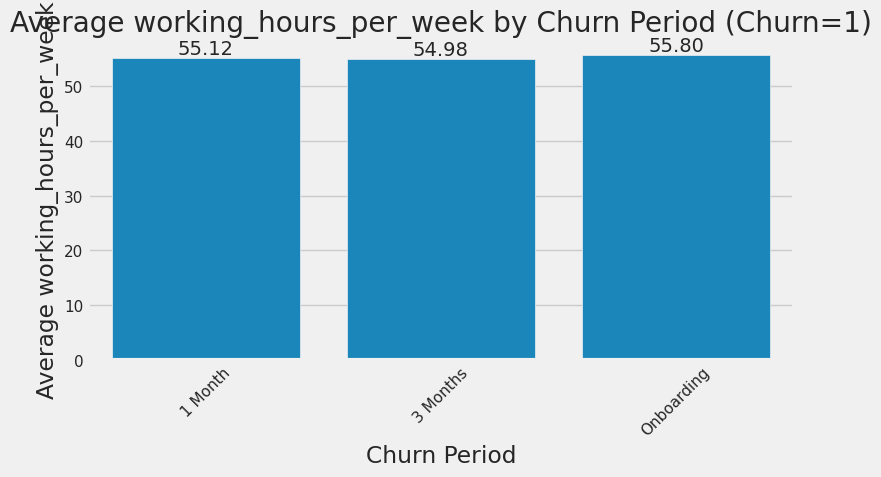

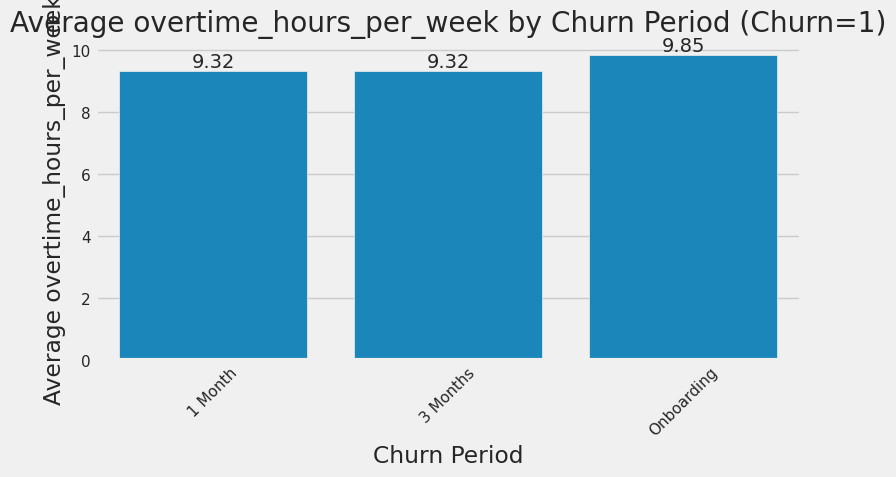

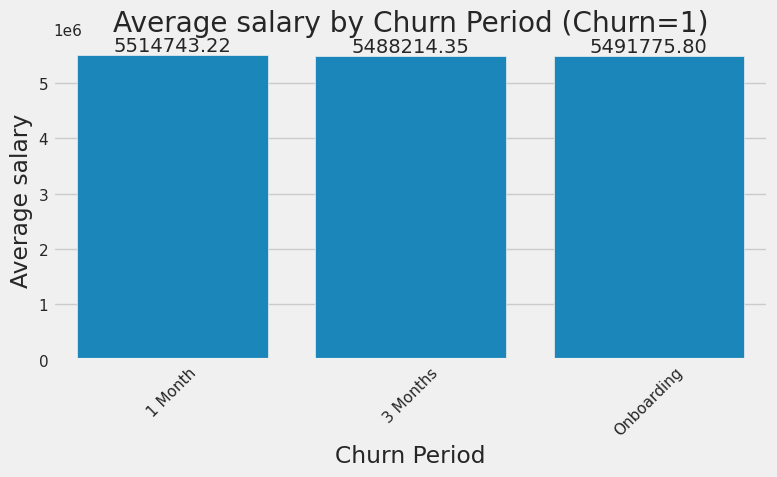

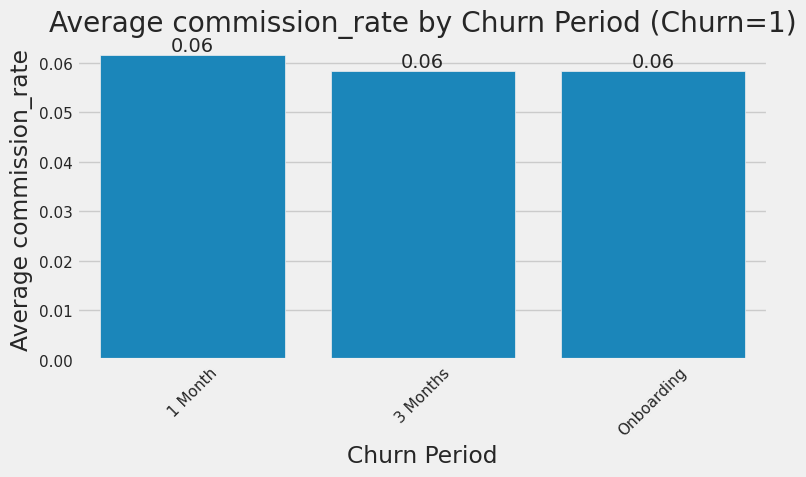

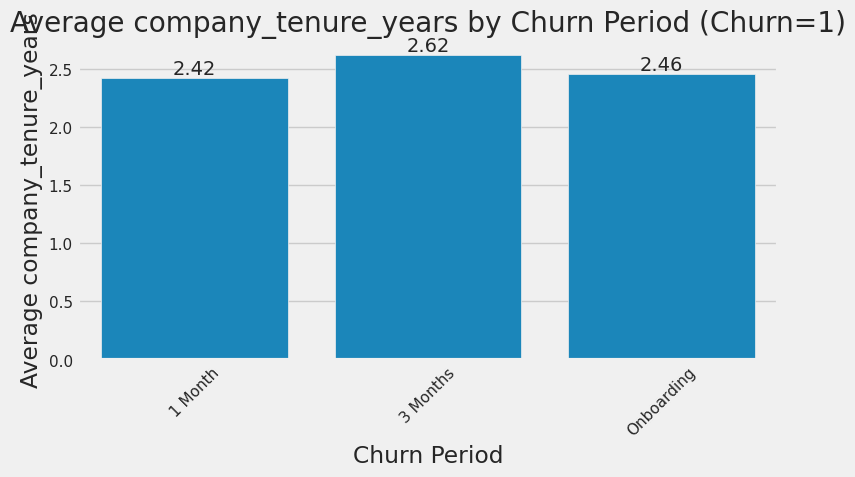

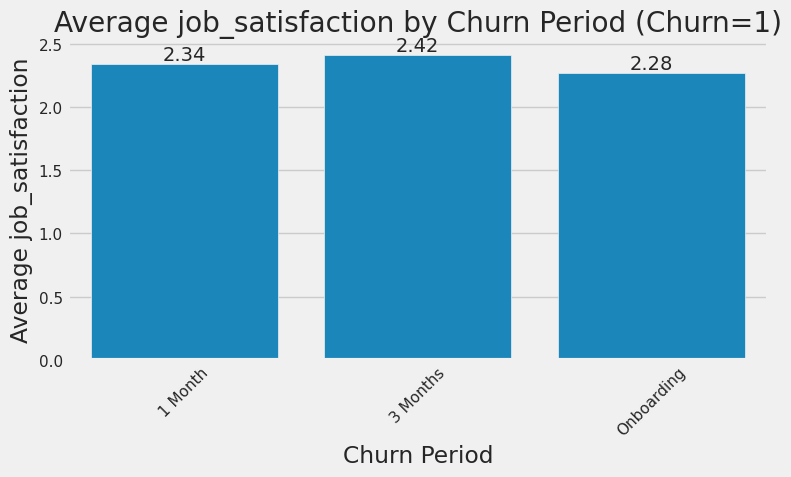

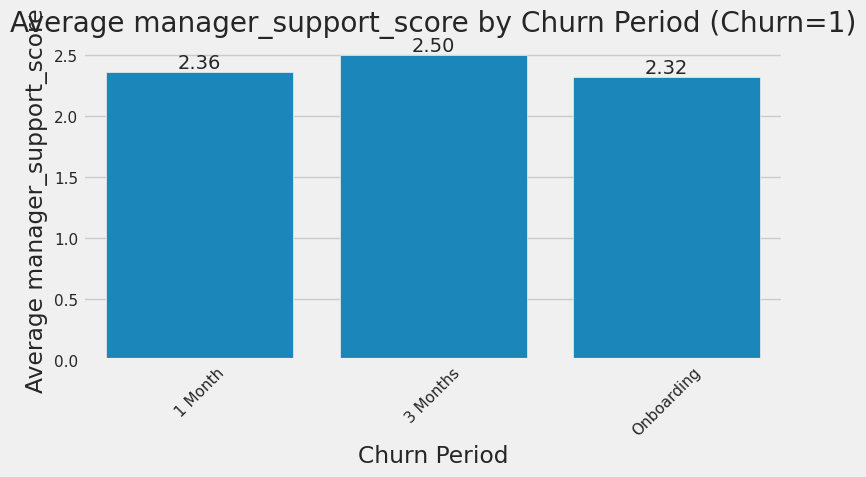

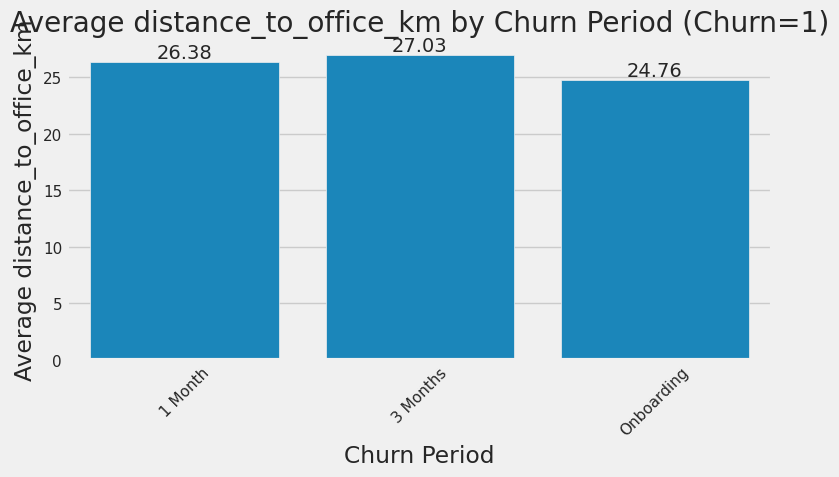

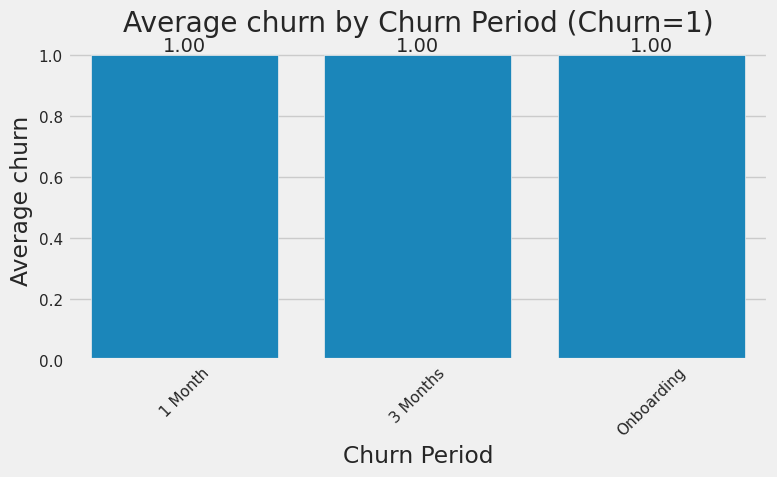

In [23]:
# === Analisis semua fitur numerik vs churn_period (khusus churn=1) ===
for col in nums:
    plt.figure(figsize=(8, 5))

    # Hitung rata-rata per churn_period
    avg_values = df_churned.groupby('churn_period')[col].mean().reset_index()

    # Buat bar chart
    ax = sns.barplot(data=avg_values, x='churn_period', y=col)

    # Tambahin angka di atas bar
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f")

    plt.title(f"Average {col} by Churn Period (Churn=1)")
    plt.xlabel("Churn Period")
    plt.ylabel(f"Average {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

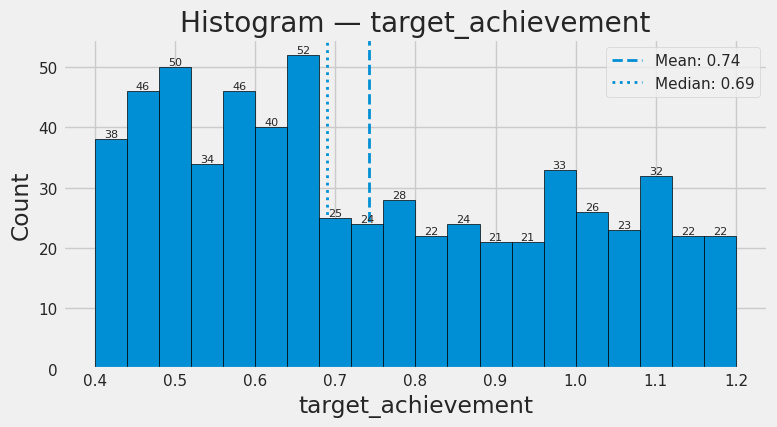

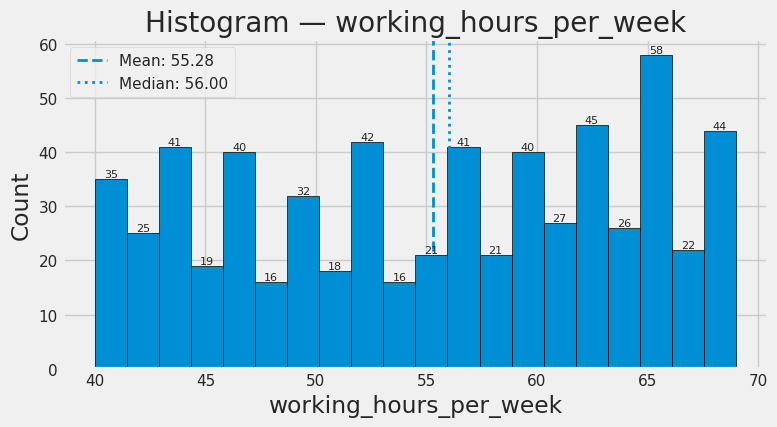

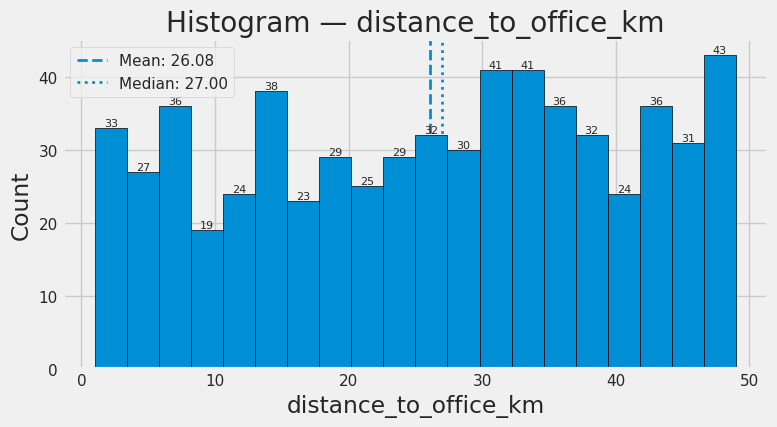

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter hanya churn = 1
df_churn1 = df[df["churn"] == 1]

def plot_hist(feature, bins=20):
    x = df_churn1[feature].dropna()
    mean_val = x.mean()
    median_val = x.median()

    fig, ax = plt.subplots(figsize=(8,4.5))
    counts, bins_edges, bars = ax.hist(x, bins=bins, edgecolor='black')

    # Garis mean & median
    ax.axvline(mean_val, linestyle='--', linewidth=2, label=f"Mean: {mean_val:.2f}")
    ax.axvline(median_val, linestyle=':', linewidth=2, label=f"Median: {median_val:.2f}")

    # Tambahkan label jumlah di atas batang
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8)

    ax.set_title(f"Histogram — {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.legend()
    plt.tight_layout()
    plt.show()

# 1) Target Achievement (sebaran pencapaian target)
plot_hist("target_achievement", bins=20)

# 2) Working Hours per Week (rata-rata jam kerja)
plot_hist("working_hours_per_week", bins=20)

# 3) Distance to Office (jarak rata-rata)
plot_hist("distance_to_office_km", bins=20)


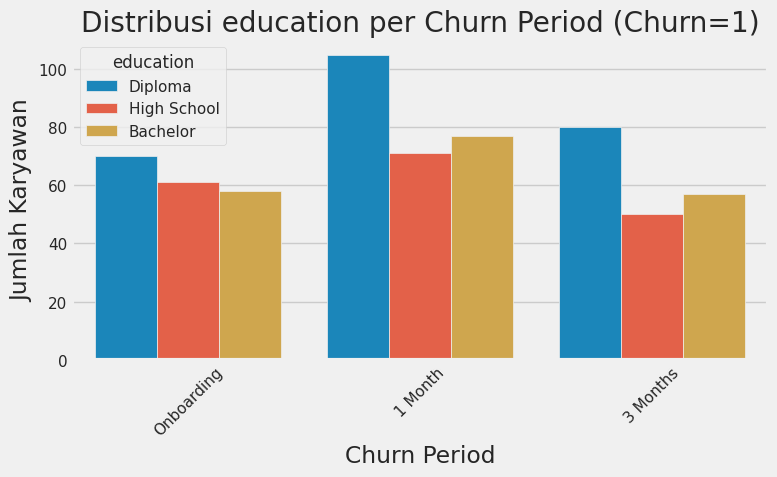

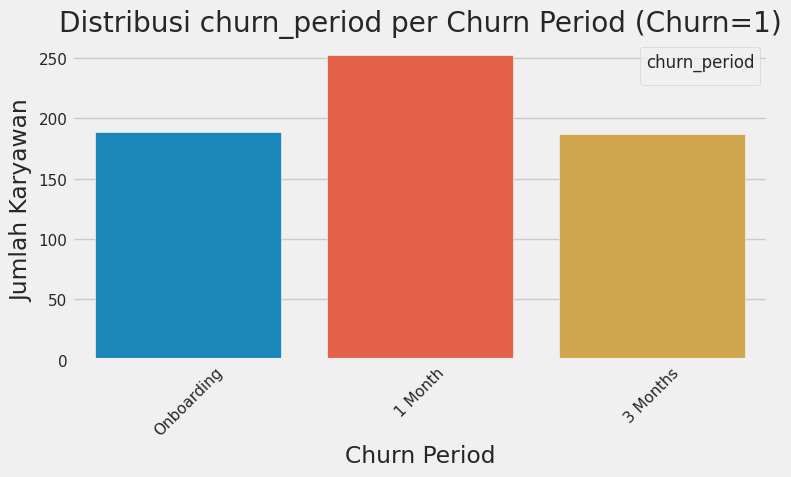

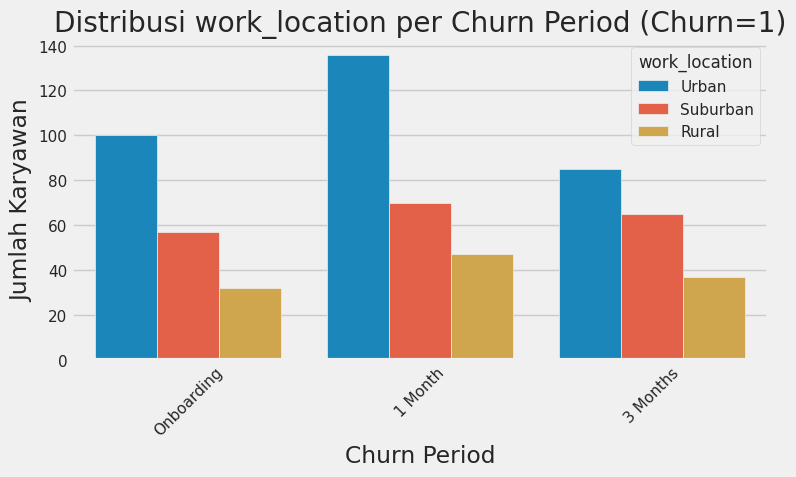

In [25]:
# === Analisis semua fitur cat vs churn_period (khusus churn=1) ===
for col in cat_bertingkat:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_churned, x='churn_period', hue=col)
    plt.title(f'Distribusi {col} per Churn Period (Churn=1)')
    plt.xlabel('Churn Period')
    plt.ylabel('Jumlah Karyawan')
    plt.xticks(rotation=45)
    plt.legend(title=col)
    plt.tight_layout()
    plt.show()

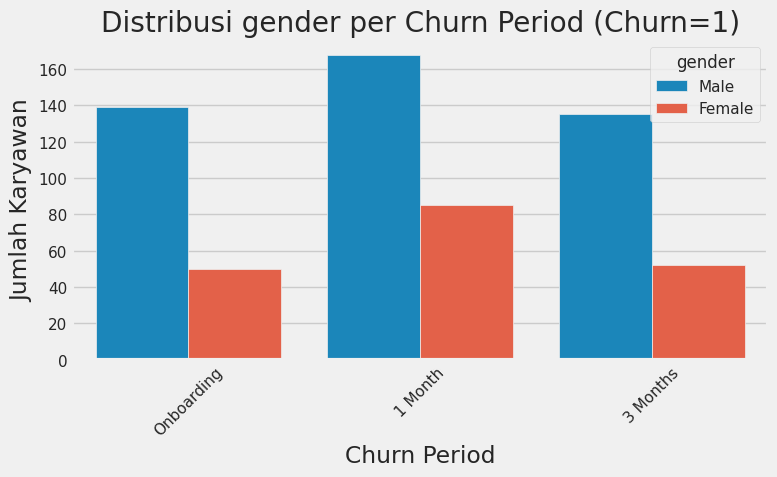

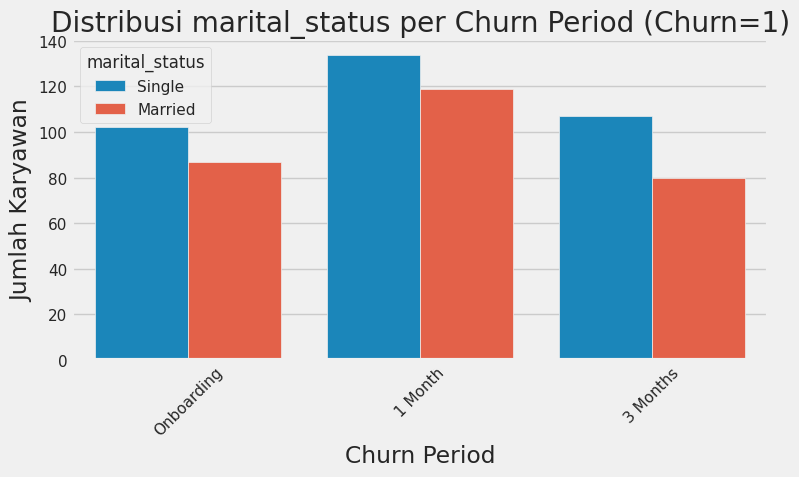

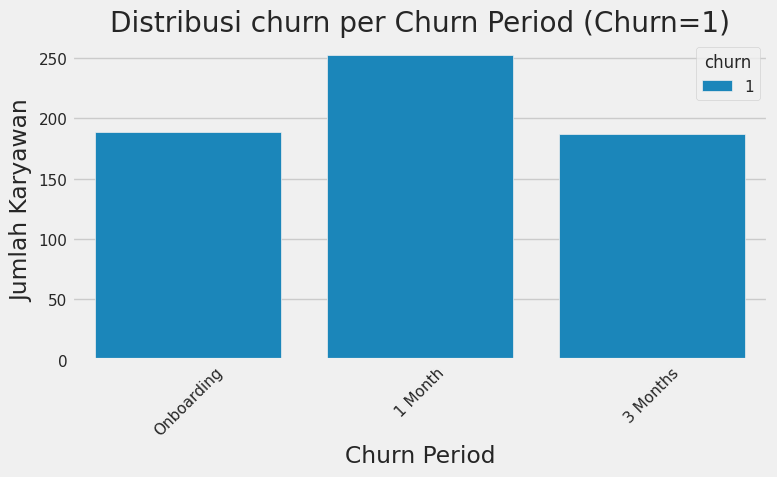

In [26]:
# === Analisis semua fitur cat vs churn_period (khusus churn=1) ===
for col in cat_biasa:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_churned, x='churn_period', hue=col)
    plt.title(f'Distribusi {col} per Churn Period (Churn=1)')
    plt.xlabel('Churn Period')
    plt.ylabel('Jumlah Karyawan')
    plt.xticks(rotation=45)
    plt.legend(title=col)
    plt.tight_layout()
    plt.show()


1. Education vs Churn Period (Churn=1)
* Karyawan dengan pendidikan Diploma mendominasi churn di semua periode, terutama pada periode 1 Month (lebih dari 100 orang).

* Pendidikan High School dan Bachelor churn-nya relatif seimbang, tapi cenderung lebih rendah dibanding Diploma.

* Indikasi: kemungkinan ekspektasi pekerjaan dan realita tidak sesuai pada kelompok pendidikan Diploma, terutama di awal masa kerja.
<br>

2. Work Location vs Churn Period (Churn=1)
* Karyawan yang bekerja di Urban memiliki jumlah churn paling tinggi di semua periode, terutama di 1 Month.

* Suburban dan Rural churn-nya lebih rendah, tapi Rural cenderung paling sedikit.

* Kemungkinan penyebab: persaingan kerja lebih ketat di daerah urban, peluang pindah kerja lebih banyak, atau faktor stres & biaya hidup.
<br>

3. Marital Status vs Churn Period

* Single memiliki jumlah churn yang lebih tinggi di semua periode dibanding Married.

* Puncak churn terjadi pada 1 Month, baik untuk Single maupun Married, tapi gap antara keduanya tetap terlihat (Single > Married).

* Kemungkinan: karyawan Single cenderung lebih mobile, lebih cepat mencari peluang baru, dan tidak terlalu terikat tanggung jawab keluarga, sehingga lebih berani resign di awal.


KESIMPULAN:

Prioritas intervensi, faktor paling ngaruh yang perlu jadi fokus perusahaan:

1. Onboarding & Adaptasi di 1 Bulan Pertama (karena churn tertinggi di sini).

2. Peningkatan Target Achievement & Kepuasan Kerja.

3. Manajerial & Dukungan Atasan.

4. Jam Kerja yang Seimbang + Perjalanan ke Kantor.

5. Retention Program untuk Karyawan Baru & Berpengalaman Rendah.

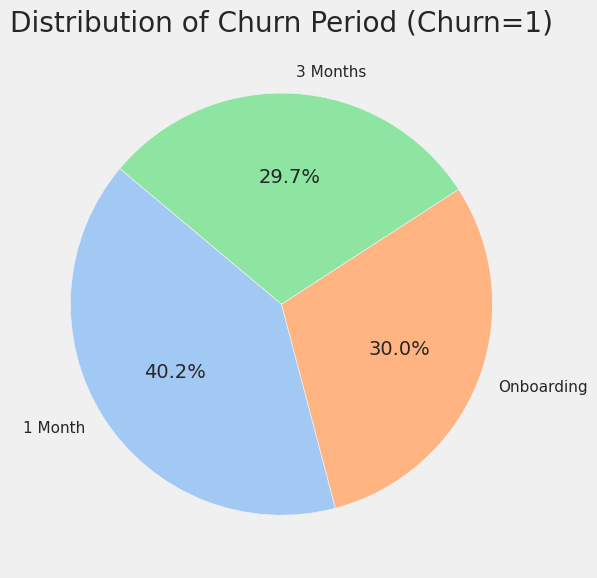

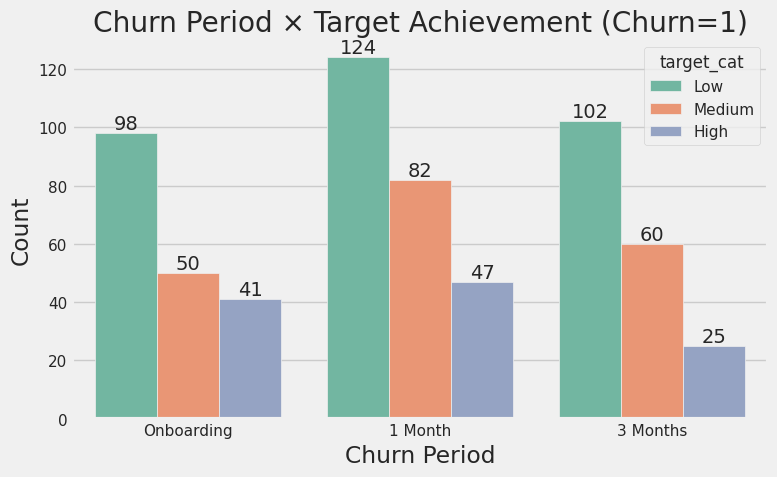

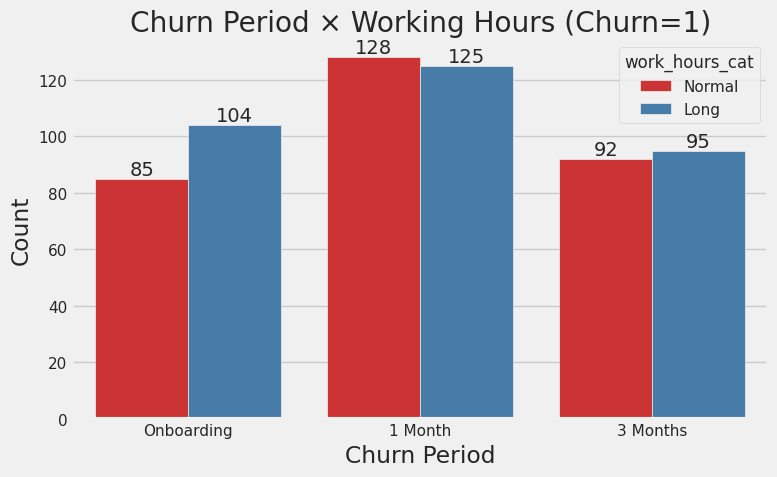

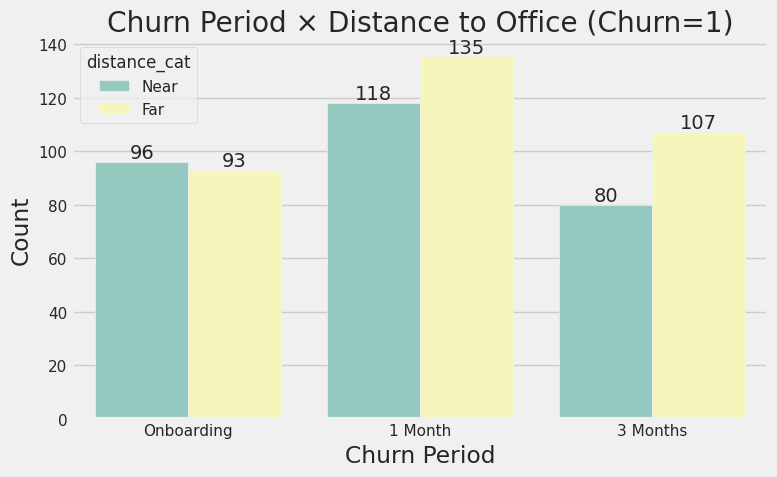

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 0) Setup Data ===
# Asumsi df sudah ada, dan df_churned hanya karyawan churn
df_churned = df[df['churn'] == 1]

# Kategorisasi Target Achievement
df_churned['target_cat'] = pd.cut(df_churned['target_achievement'],
                                  bins=[0, 0.7, 1.0, df_churned['target_achievement'].max()],
                                  labels=['Low', 'Medium', 'High'])

# Kategorisasi Working Hours
df_churned['work_hours_cat'] = pd.cut(df_churned['working_hours_per_week'],
                                      bins=[0, 55, df_churned['working_hours_per_week'].max()],
                                      labels=['Normal', 'Long'])

# Kategorisasi Distance to Office
df_churned['distance_cat'] = pd.cut(df_churned['distance_to_office_km'],
                                    bins=[0, 25, df_churned['distance_to_office_km'].max()],
                                    labels=['Near', 'Far'])

# === 1) Distribusi Churn Period (Overall) — Pie Chart ===
plt.figure(figsize=(6,6))
counts = df_churned['churn_period'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Distribution of Churn Period (Churn=1)")
plt.tight_layout()
plt.show()

# === 2) Churn Period × Target Achievement — Grouped Bar Chart ===
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_churned, x='churn_period', hue='target_cat', palette='Set2')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Churn Period × Target Achievement (Churn=1)")
plt.xlabel("Churn Period")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# === 3) Churn Period × Working Hours — Grouped Bar Chart ===
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_churned, x='churn_period', hue='work_hours_cat', palette='Set1')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Churn Period × Working Hours (Churn=1)")
plt.xlabel("Churn Period")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# === 4) Churn Period × Distance to Office — Grouped Bar Chart ===
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_churned, x='churn_period', hue='distance_cat', palette='Set3')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Churn Period × Distance to Office (Churn=1)")
plt.xlabel("Churn Period")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# Data Preparation

## Handling Missing Value

In [28]:
df.isna().sum()

employee_id                0
age                        0
gender                     0
education                  0
experience_years           0
monthly_target             0
target_achievement         0
working_hours_per_week     0
overtime_hours_per_week    0
salary                     0
commission_rate            0
job_satisfaction           0
work_location              0
manager_support_score      0
company_tenure_years       0
churn                      0
marital_status             0
distance_to_office_km      0
churn_period               0
dtype: int64

## Handling Duplicate Value

In [29]:
# Duplicate Value
df.duplicated().sum()

np.int64(0)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_id              1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   gender                   1000 non-null   object 
 3   education                1000 non-null   object 
 4   experience_years         1000 non-null   int64  
 5   monthly_target           1000 non-null   int64  
 6   target_achievement       1000 non-null   float64
 7   working_hours_per_week   1000 non-null   int64  
 8   overtime_hours_per_week  1000 non-null   int64  
 9   salary                   1000 non-null   int64  
 10  commission_rate          1000 non-null   float64
 11  job_satisfaction         1000 non-null   int64  
 12  work_location            1000 non-null   object 
 13  manager_support_score    1000 non-null   int64  
 14  company_tenure_years     

## Handling Outliers (z-socre)

In [31]:
# Outliers
from scipy import stats
# Filter Outliers menggunakan z-score

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['employee_id', 'age', 'experience_years','monthly_target', 'target_achievement',
        'working_hours_per_week', 'overtime_hours_per_week', 'salary', 'commission_rate',
        'job_satisfaction', 'manager_support_score','company_tenure_years',
        'distance_to_office_km']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df2 = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df2)}')

Jumlah baris sebelum memfilter outlier: 1000
Jumlah baris setelah memfilter outlier: 1000


In [32]:
# Dataset df dan df2 tidak memiliki perbedaan

# Feature Enginering

## Feature Extraction

1. overtime_ratio : proporsi jam lembur terhadap total jam kerja
- overtime_hours_per_week / working_hours_per_week


2. tenure_per_age: perbandingan lama kerja dengan umur
- company_tenure_years / age


3. performance_gap : menilai karyawan yang tidak memenuhi target (berkinerja rendah)
- 1 - target_achievement


4. salary_per_hour : Perbandingan gaji dengan jumlah jam kerja dalam satu minggu
- salary / working_hours_per_week


5. satisfaction_support_mean : Rata-rata Job Satisfaction ditambah dengan Manager Support
- (job_satisfaction + manager_support_score) / 2


6. commuting_work_ratio : Rasio jarak dari rumah ke kantor dengan jam kerja per minggu
- distance_to_office_km / working_hours_per_week


7. salary_commission_rate : Total pendapatan bulanan yang dimungkinkan dibawa pulang oleh pekerja.
- salary * target_achievement * commission_rate

In [33]:
# Safe division helper
def safe_div(numer, denom):
    return np.where((denom == 0) | pd.isna(denom), np.nan, numer / denom)

# Feature Engineering
df['overtime_ratio'] = safe_div(df['overtime_hours_per_week'], df['working_hours_per_week'])
df['tenure_per_age'] = safe_div(df['company_tenure_years'], df['age'])
df['performance_gap'] = 1 - df['target_achievement']
df['salary_per_hour'] = safe_div(df['salary'], df['working_hours_per_week'])
df['satisfaction_support_mean'] = (df['job_satisfaction'] + df['manager_support_score']) / 2
df['commuting_work_ratio'] = safe_div(df['distance_to_office_km'], df['working_hours_per_week'])
df['salary_commission_rate'] = df['salary'] * df['target_achievement'] * df['commission_rate']

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   employee_id                1000 non-null   int64  
 1   age                        1000 non-null   int64  
 2   gender                     1000 non-null   object 
 3   education                  1000 non-null   object 
 4   experience_years           1000 non-null   int64  
 5   monthly_target             1000 non-null   int64  
 6   target_achievement         1000 non-null   float64
 7   working_hours_per_week     1000 non-null   int64  
 8   overtime_hours_per_week    1000 non-null   int64  
 9   salary                     1000 non-null   int64  
 10  commission_rate            1000 non-null   float64
 11  job_satisfaction           1000 non-null   int64  
 12  work_location              1000 non-null   object 
 13  manager_support_score      1000 non-null   int64 

## Split Data

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2

In [36]:
# Drop ID and leakage feature
df = df.drop(columns=['employee_id', 'churn_period'])

# Separate target
X = df.drop(columns=['churn'])
y = df['churn']

# Train-test split (example: 80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [37]:
X_test.shape

(200, 23)

## Feature Encoding

In [38]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# Columns to encode
cat_onehot = ['gender', 'marital_status']
cat_label = ['education', 'work_location']

# --- 1. One-Hot Encoding ---
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe_train = ohe.fit_transform(X_train[cat_onehot])
ohe_test = ohe.transform(X_test[cat_onehot])

# Create dataframe for one-hot encoded columns
ohe_train_df = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out(cat_onehot), index=X_train.index)
ohe_test_df = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out(cat_onehot), index=X_test.index)

# --- 2. Label Encoding ---
le_train_df = X_train[cat_label].copy()
le_test_df = X_test[cat_label].copy()

for col in cat_label:
    le = LabelEncoder()
    le_train_df[col] = le.fit_transform(X_train[col])
    le_test_df[col] = le.transform(X_test[col])

# --- 3. Combine Encoded Features with Numerical Columns ---
# Numerical columns = all except the categorical ones
num_cols = X_train.drop(columns=cat_onehot + cat_label).columns

X_train_enc = pd.concat([X_train[num_cols], le_train_df, ohe_train_df], axis=1)
X_test_enc = pd.concat([X_test[num_cols], le_test_df, ohe_test_df], axis=1)


In [39]:
# --- 3. Combine back to overwrite X_train / X_test ---
num_cols = X_train.drop(columns=cat_onehot + cat_label).columns
X_train = pd.concat([X_train[num_cols], le_train_df, ohe_train_df], axis=1)
X_test = pd.concat([X_test[num_cols], le_test_df, ohe_test_df], axis=1)

# --- 4. Check results ---
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("\nSample X_train:\n", X_train.head())

X_train shape: (800, 23)
X_test shape: (200, 23)

Sample X_train:
      age  experience_years  monthly_target  target_achievement  \
12    25                 6             174                0.84   
272   29                 8             138                1.09   
564   33                 3             126                0.94   
462   26                 4             198                1.17   
123   24                 6             108                0.75   

     working_hours_per_week  overtime_hours_per_week   salary  \
12                       64                        2  5350716   
272                      60                        4  3386354   
564                      46                       13  6169870   
462                      66                        0  5036721   
123                      59                       17  5374151   

     commission_rate  job_satisfaction  manager_support_score  ...  \
12              0.10                 3                      1  ...   
272  

In [40]:
# Check for null values in X_train and X_test
null_train = X_train.isnull().sum()
null_test = X_test.isnull().sum()

print("Null values in X_train:")
print(null_train[null_train > 0])

print("\nNull values in X_test:")
print(null_test[null_test > 0])

Null values in X_train:
Series([], dtype: int64)

Null values in X_test:
Series([], dtype: int64)


## Standarisasi

In [41]:
from sklearn.preprocessing import StandardScaler

# --- 1. Identify numerical columns ---
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# --- 2. Initialize scaler ---
scaler = StandardScaler()

# --- 3. Fit on training data, transform both ---
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# --- 4. Check result ---
print("X_train after scaling:\n", X_train.head())
print("\nMean (train):\n", X_train[num_cols].mean())
print("\nStd Dev (train):\n", X_train[num_cols].std())

X_train after scaling:
           age  experience_years  monthly_target  target_achievement  \
12  -1.163628          0.496584        1.051401            0.219958   
272 -0.582994          1.186284        0.226436            1.301897   
564 -0.002359         -0.537966       -0.048553            0.652734   
462 -1.018470         -0.193116        1.601378            1.648117   
123 -1.308787          0.496584       -0.461035           -0.169540   

     working_hours_per_week  overtime_hours_per_week    salary  \
12                 1.146229                -1.306973 -0.095667   
272                0.688595                -0.955341 -1.471496   
564               -0.913122                 0.627004  0.478064   
462                1.375046                -1.658606 -0.315588   
123                0.574187                 1.330269 -0.079254   

     commission_rate  job_satisfaction  manager_support_score  ...  \
12          1.790099          0.418859              -1.358819  ...   
272        -

## Handling Class Imbalance

Before SMOTE:
churn
1    503
0    297
Name: count, dtype: int64

After SMOTE:
churn
0    503
1    503
Name: count, dtype: int64


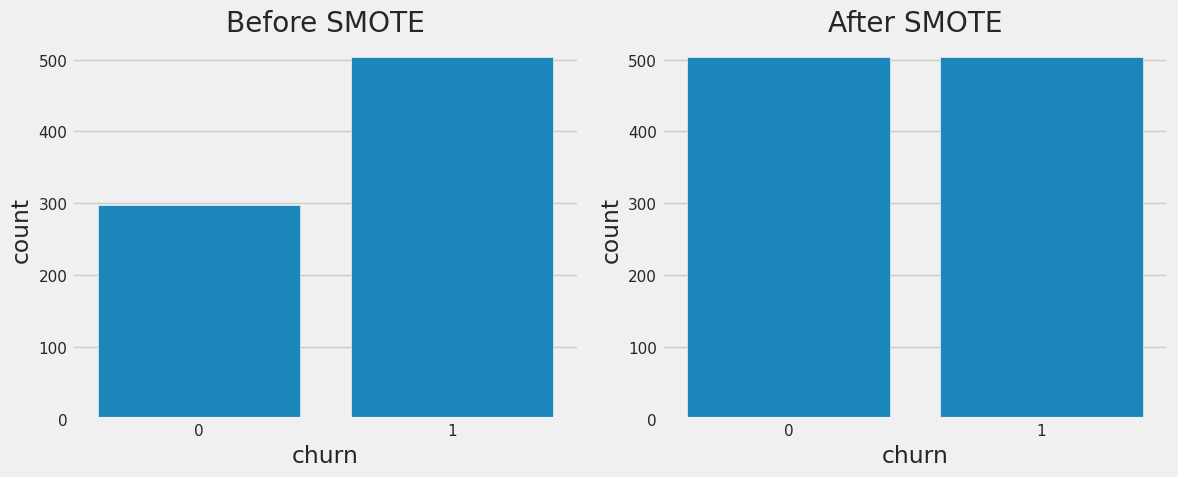

In [42]:
from imblearn.over_sampling import SMOTE

# Misal X_train_processed & y_train hasil preprocessing
smote = SMOTE(random_state=42)

# handling class imbalance menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# melihat distribusi kelas sebelum dan sesudah
print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_train_smote).value_counts())

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=y_train, ax=axs[0])
axs[0].set_title("Before SMOTE")
sns.countplot(x=y_train_smote, ax=axs[1])
axs[1].set_title("After SMOTE")
plt.tight_layout()
plt.show()

## Feature Importance

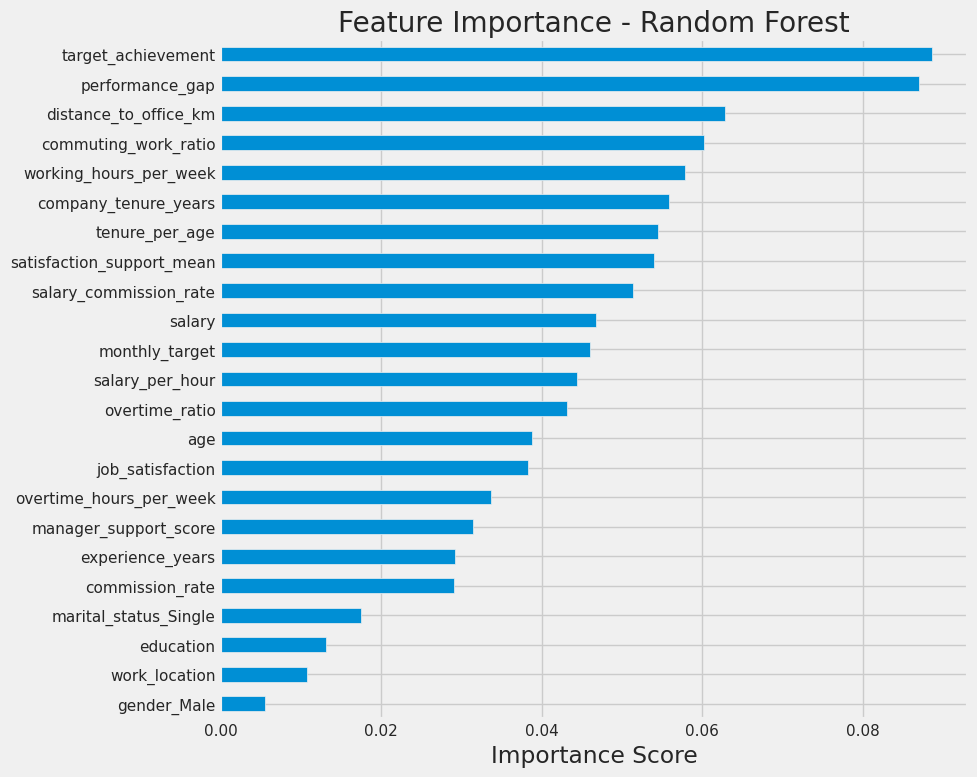

In [43]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Pisahkan fitur dan target
X = X_train  # employee_id tidak relevan, churn = target
y = y_train

# Bangun model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Hitung feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=True)

# Visualisasi
plt.figure(figsize=(10, 8))
importances_sorted.plot(kind='barh')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [44]:
# run in terminal / notebook cell if packages missing
!pip install xgboost catboost imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.2 MB/s eta 0:00:00


In [45]:
X_test.head()

age  experience_years  monthly_target  target_achievement  \
570  0.578276         -1.572517       -0.254794           -0.429205   
790 -1.163628         -1.227666       -1.652652            1.604840   
909  0.142800          1.186284       -1.148506           -0.559038   
366 -1.308787         -1.227666       -0.483951            1.734672   
273 -1.163628         -1.572517       -0.415204           -1.208201   

     working_hours_per_week  overtime_hours_per_week    salary  \
570                1.489454                 0.978637  1.618442   
790                1.146229                -1.658606 -0.766309   
909                0.230962                -1.482789  0.154635   
366                0.574187                 0.627004  1.659099   
273                0.002145                 1.330269  0.317168   

     commission_rate  job_satisfaction  manager_support_score  ...  \
570         1.790099         -1.363519              -0.463387  ...   
790         0.920063          0.418859               0.432046  ...   
909         0.050027         -0.472330              -0.463387  ...   
366        -0.820009         -1.363519               0.432046  ...   
273        -0.384991          1.310048               0.432046  ...   

     tenure_per_age  performance_gap  salary_per_hour  \
570       -0.518740         0.429205         0.385815   
790        0.113784        -1.604840        -1.120974   
909       -0.417353         0.559038        -0.070490   
366        2.549949        -1.734672         0.914914   
273        1.247512         1.208201         0.184272   

     satisfaction_support_mean  commuting_work_ratio  salary_commission_rate  \
570                  -1.300756             -0.615464                1.948525   
790                   0.605113              0.329183                1.053894   
909                  -0.665466             -0.415609               -0.192548   
366                  -0.665466             -0.416695                0.822391   
273                   1.240403              0.825415               -0.704211   

     education  work_location  gender_Male  marital_status_Single  
570   1.316670       0.893020     0.648814               0.803798  
790  -1.271379       0.893020    -1.541275               0.803798  
909   0.022645       0.893020    -1.541275               0.803798  
366   0.022645       0.893020     0.648814              -1.244094  
273  -1.271379      -1.719104     0.648814               0.803798  

[5 rows x 23 columns]

# Modelling

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [47]:
!pip install catboost
from catboost import CatBoostClassifier

## Build Model

In [48]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score, fbeta_score, roc_auc_score, confusion_matrix
import pandas as pd
import numpy as np

# Dictionary to store models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Store results
results = []

# Stratified K-Fold (preserve churn ratio)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each model
for name, model in models.items():
    print(f"\n===== {name} =====")

    # Cross-validation scores
    recall_scores = []
    f2_scores = []
    auc_scores = []

    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]


        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)
        y_val_prob = model.predict_proba(X_val)[:, 1]

        recall_scores.append(recall_score(y_val, y_val_pred))
        f2_scores.append(fbeta_score(y_val, y_val_pred, beta=2))
        auc_scores.append(roc_auc_score(y_val, y_val_prob))

    # Train final model on all training data
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Confusion matrix on test set
    cm = confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix (Test Set):")
    print(cm)

    # Append CV average results
    results.append({
        "Model": name,
        "Recall (CV avg)": np.mean(recall_scores),
        "F2-score (CV avg)": np.mean(f2_scores),
        "AUC (CV avg)": np.mean(auc_scores)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by="F2-score (CV avg)", ascending=False)

print("\n=== Cross-Validation Results ===")
print(results_df)



===== Logistic Regression =====
Confusion Matrix (Test Set):
[[ 34  40]
 [ 18 108]]

===== Decision Tree =====
Confusion Matrix (Test Set):
[[33 41]
 [38 88]]

===== KNN =====
Confusion Matrix (Test Set):
[[38 36]
 [31 95]]

===== Random Forest =====
Confusion Matrix (Test Set):
[[ 42  32]
 [ 25 101]]

===== XGBoost =====
Confusion Matrix (Test Set):
[[40 34]
 [30 96]]

===== CatBoost =====
Confusion Matrix (Test Set):
[[ 42  32]
 [ 25 101]]

=== Cross-Validation Results ===
                 Model  Recall (CV avg)  F2-score (CV avg)  AUC (CV avg)
0  Logistic Regression         0.824970           0.811095      0.779860
3        Random Forest         0.825010           0.808896      0.779113
5             CatBoost         0.821089           0.807581      0.802683
4              XGBoost         0.793228           0.783828      0.763186
2                  KNN         0.773327           0.761224      0.700749
1        Decision Tree         0.711822           0.713442      0.623453


## Visualisasi Hasil Modelling

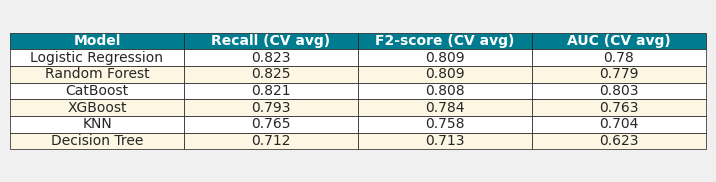

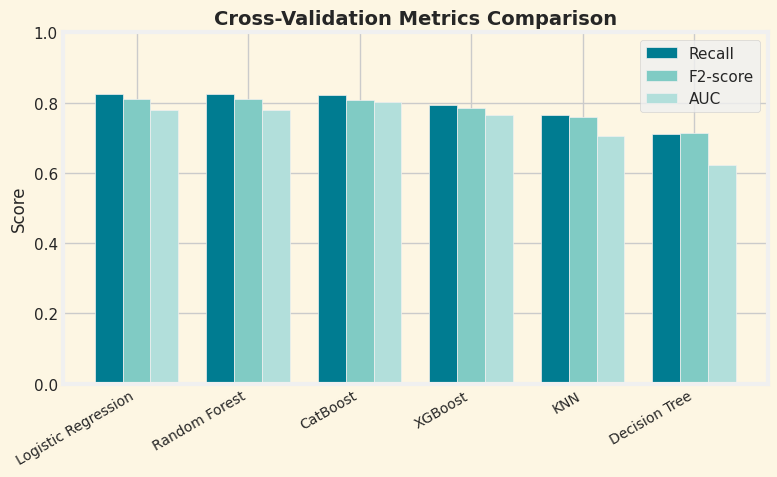

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Your CV results
data = {
    "Model": ["Logistic Regression", "Random Forest", "CatBoost", "XGBoost", "KNN", "Decision Tree"],
    "Recall (CV avg)": [0.822990, 0.825010, 0.821089, 0.793228, 0.765366, 0.711822],
    "F2-score (CV avg)": [0.809482, 0.809211, 0.807581, 0.783828, 0.758394, 0.713442],
    "AUC (CV avg)": [0.780060, 0.778947, 0.802683, 0.763186, 0.703979, 0.623453]
}

df = pd.DataFrame(data)

# ===== Visual Table =====
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('tight')
ax.axis('off')

# Create table with custom colors
table = ax.table(cellText=df.round(3).values,
                 colLabels=df.columns,
                 loc='center',
                 cellLoc='center')

# Style the table
for (i, j), cell in table.get_celld().items():
    if i == 0:  # header
        cell.set_facecolor('#007C91')  # teal blue
        cell.set_text_props(color='white', weight='bold')
    else:
        if i % 2 == 0:
            cell.set_facecolor('#fdf6e3')  # light cream
        else:
            cell.set_facecolor('#ffffff')  # white

plt.show()

# ===== Bar Chart =====
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.25
x = range(len(df))

# Plot each metric
ax.bar([p - bar_width for p in x], df["Recall (CV avg)"], width=bar_width, label='Recall', color='#007C91')
ax.bar(x, df["F2-score (CV avg)"], width=bar_width, label='F2-score', color='#80CBC4')
ax.bar([p + bar_width for p in x], df["AUC (CV avg)"], width=bar_width, label='AUC', color='#B2DFDB')

# X-axis labels and formatting
ax.set_xticks(x)
ax.set_xticklabels(df["Model"], rotation=30, ha='right', fontsize=10)
ax.set_ylabel("Score", fontsize=12)
ax.set_title("Cross-Validation Metrics Comparison", fontsize=14, fontweight='bold')
ax.set_ylim(0, 1)
ax.legend()

# Light cream background
fig.patch.set_facecolor('#fdf6e3')
ax.set_facecolor('#fdf6e3')

plt.tight_layout()
plt.show()


## Hyperparameter Tunning

### Cat Boost Tunning

In [50]:
from sklearn.metrics import make_scorer, fbeta_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

# Create F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# CatBoost
cat = CatBoostClassifier(verbose=0, random_state=42)

# Parameter grid
param_grid_cat = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [200, 500]
}

# GridSearchCV
grid_cat = GridSearchCV(
    cat,
    param_grid_cat,
    scoring=f2_scorer,  # Use custom scorer
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit
grid_cat.fit(X_train, y_train)

# Best model
best_cat = grid_cat.best_estimator_

# Predict
y_pred = best_cat.predict(X_test)
y_proba = best_cat.predict_proba(X_test)[:, 1]

# Calculate metrics
f2 = fbeta_score(y_test, y_pred, beta=2)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print(f"Best Params: {grid_cat.best_params_}")
print(f"F2-score: {f2:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Params: {'depth': 4, 'iterations': 200, 'learning_rate': 0.01}
F2-score: 0.8398
Recall: 0.8651
AUC: 0.8063


### Random Forest Tunning

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, recall_score, roc_auc_score
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Define Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Parameter grid for tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search with 5-fold CV
grid_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring='recall',  # main metric for CV ranking
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_rf.fit(X_train, y_train)

# Best model
best_rf = grid_rf.best_estimator_

# Predict
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

# Business metrics
f2_rf = fbeta_score(y_test, y_pred_rf, beta=2)
recall_rf = recall_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

# Output results
print("\n=== Random Forest Tuning Results ===")
print("Best Parameters:", grid_rf.best_params_)
print(f"F2-score: {f2_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"AUC: {auc_rf:.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits

=== Random Forest Tuning Results ===
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
F2-score: 0.8125
Recall: 0.8254
AUC: 0.7921


### Logistic Regression Tunning

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, fbeta_score, roc_auc_score
import numpy as np

# Ensure reproducibility
np.random.seed(42)

# Define model
log_reg = LogisticRegression(solver='liblinear', random_state=42)

# Parameter grid
param_grid_lr = {
    'penalty': ['l1', 'l2'],            # Regularization type
    'C': [0.01, 0.1, 1, 10],            # Regularization strength
    'class_weight': [None, 'balanced']  # Handle imbalance
}

# Grid search
grid_lr = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid_lr,
    scoring='recall',   # Optimize for recall
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit model
grid_lr.fit(X_train, y_train)

# Best model
best_lr = grid_lr.best_estimator_
print("Best parameters for Logistic Regression:", grid_lr.best_params_)

# Predict
y_pred = best_lr.predict(X_test)
y_proba = best_lr.predict_proba(X_test)[:, 1]

# Metrics
recall = recall_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)
auc = roc_auc_score(y_test, y_proba)

print("\n=== Logistic Regression Test Set Metrics ===")
print(f"Recall: {recall:.4f}")
print(f"F2-score: {f2:.4f}")
print(f"AUC: {auc:.4f}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for Logistic Regression: {'C': 0.1, 'class_weight': None, 'penalty': 'l1'}

=== Logistic Regression Test Set Metrics ===
Recall: 0.8492
F2-score: 0.8231
AUC: 0.7719


### XGBoost Tunning

In [53]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, fbeta_score, roc_auc_score
import numpy as np

# Ensure reproducibility
np.random.seed(42)

# Define model
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Grid search
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='recall',  # Optimize for recall
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit model
grid_xgb.fit(X_train, y_train)

# Best model
best_xgb = grid_xgb.best_estimator_
print("Best parameters for XGBoost:", grid_xgb.best_params_)

# Predict
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]

# Metrics
recall = recall_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)
auc = roc_auc_score(y_test, y_proba)

print("\n=== XGBoost Test Set Metrics ===")
print(f"Recall: {recall:.4f}")
print(f"F2-score: {f2:.4f}")
print(f"AUC: {auc:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

=== XGBoost Test Set Metrics ===
Recall: 0.9127
F2-score: 0.8660
AUC: 0.7790


### K-Nearest Neighbor (KNN)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, fbeta_score, roc_auc_score
import numpy as np

# Ensure reproducibility
np.random.seed(42)

# Define model
knn = KNeighborsClassifier()

# Parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

# Grid search
grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    scoring='recall',  # Optimize for recall
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit model
grid_knn.fit(X_train, y_train)

# Best model
best_knn = grid_knn.best_estimator_
print("Best parameters for KNN:", grid_knn.best_params_)

# Predict
y_pred = best_knn.predict(X_test)
y_proba = best_knn.predict_proba(X_test)[:, 1]

# Metrics
recall = recall_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)
auc = roc_auc_score(y_test, y_proba)

print("\n=== KNN Test Set Metrics ===")
print(f"Recall: {recall:.4f}")
print(f"F2-score: {f2:.4f}")
print(f"AUC: {auc:.4f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

=== KNN Test Set Metrics ===
Recall: 0.8095
F2-score: 0.7944
AUC: 0.7560


### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, fbeta_score, roc_auc_score
import numpy as np

# Ensure reproducibility
np.random.seed(42)

# Define model
dt = DecisionTreeClassifier(random_state=42)

# Parameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Grid search
grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    scoring='recall',  # Optimize for recall
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit model
grid_dt.fit(X_train, y_train)

# Best model
best_dt = grid_dt.best_estimator_
print("Best parameters for Decision Tree:", grid_dt.best_params_)

# Predict
y_pred = best_dt.predict(X_test)
y_proba = best_dt.predict_proba(X_test)[:, 1]

# Metrics
recall = recall_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)
auc = roc_auc_score(y_test, y_proba)

print("\n=== Decision Tree Test Set Metrics ===")
print(f"Recall: {recall:.4f}")
print(f"F2-score: {f2:.4f}")
print(f"AUC: {auc:.4f}")


Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}

=== Decision Tree Test Set Metrics ===
Recall: 0.6429
F2-score: 0.6575
AUC: 0.6715


## Perbandingan Performa Model

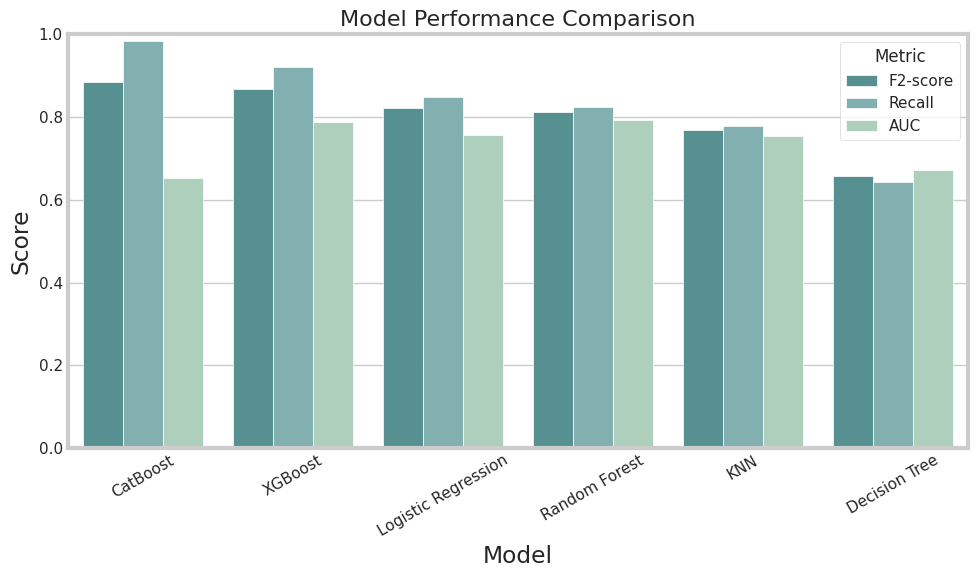

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Prepare the data
# -----------------------------
data = {
    'Model': ['CatBoost', 'Random Forest', 'Logistic Regression', 'XGBoost', 'KNN', 'Decision Tree'],
    'F2-score': [0.8857, 0.8125, 0.8218, 0.8670, 0.7680, 0.6575],
    'Recall': [0.9841, 0.8254, 0.8492, 0.9206, 0.7778, 0.6429],
    'AUC': [0.6528, 0.7919, 0.7555, 0.7879, 0.7549, 0.6715]
}

df = pd.DataFrame(data)

# -----------------------------
# Sort the table by priority: F2-score, Recall, AUC
# -----------------------------
df_sorted = df.sort_values(by=['F2-score', 'Recall', 'AUC'], ascending=False).reset_index(drop=True)

# -----------------------------
# Display as styled table
# -----------------------------
def highlight_table(val):
    color = '#f8f4f0'  # cream background
    return f'background-color: {color}; font-weight: bold;'

styled_table = df_sorted.style.applymap(highlight_table)
display(styled_table)

# -----------------------------
# Plot as bar chart (sorted)
# -----------------------------
sns.set_style("whitegrid")
palette = ['#4C9A9A', '#7BB6B6', '#A8D5BA']  # blue-teal tones

# Melt dataframe for plotting
df_melted = df_sorted.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10,6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette=palette, order=df_sorted['Model'])
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Before tuning metrics
# -----------------------------
before_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'CatBoost', 'XGBoost', 'KNN', 'Decision Tree'],
    'F2-score_before': [0.809482, 0.809211, 0.807581, 0.783828, 0.758394, 0.713442],
    'Recall_before': [0.822990, 0.825010, 0.821089, 0.793228, 0.765366, 0.711822],
    'AUC_before': [0.780060, 0.778947, 0.802683, 0.763186, 0.703979, 0.623453]
}

# -----------------------------
# After tuning metrics
# -----------------------------
after_data = {
    'Model': ['CatBoost', 'Random Forest', 'Logistic Regression', 'XGBoost', 'KNN', 'Decision Tree'],
    'Best_Params': [
        "{'depth': 4, 'iterations': 200, 'learning_rate': 0.01}",
        "{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}",
        "{'C': 0.01, 'class_weight': None, 'penalty': 'l2'}",
        "{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}",
        "{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}",
        "{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}"
    ],
    'F2-score_after': [0.8857, 0.8125, 0.8218, 0.8670, 0.7680, 0.6575],
    'Recall_after': [0.9841, 0.8254, 0.8492, 0.9206, 0.7778, 0.6429],
    'AUC_after': [0.6528, 0.7919, 0.7555, 0.7879, 0.7549, 0.6715]
}

df_before = pd.DataFrame(before_data)
df_after = pd.DataFrame(after_data)

# Merge before and after by Model
df = pd.merge(df_before, df_after, on='Model')

# -----------------------------
# Sort by priority: F2-score_after -> Recall_after -> AUC_after
# -----------------------------
df_sorted = df.sort_values(by=['F2-score_after', 'Recall_after', 'AUC_after'], ascending=False).reset_index(drop=True)

# -----------------------------
# Display styled comparison table with Best Parameters
# -----------------------------
def highlight_table(val):
    color = '#f8f4f0'  # cream background
    return f'background-color: {color}; font-weight: bold;'

styled_table = df_sorted.style.applymap(highlight_table)
display(styled_table)


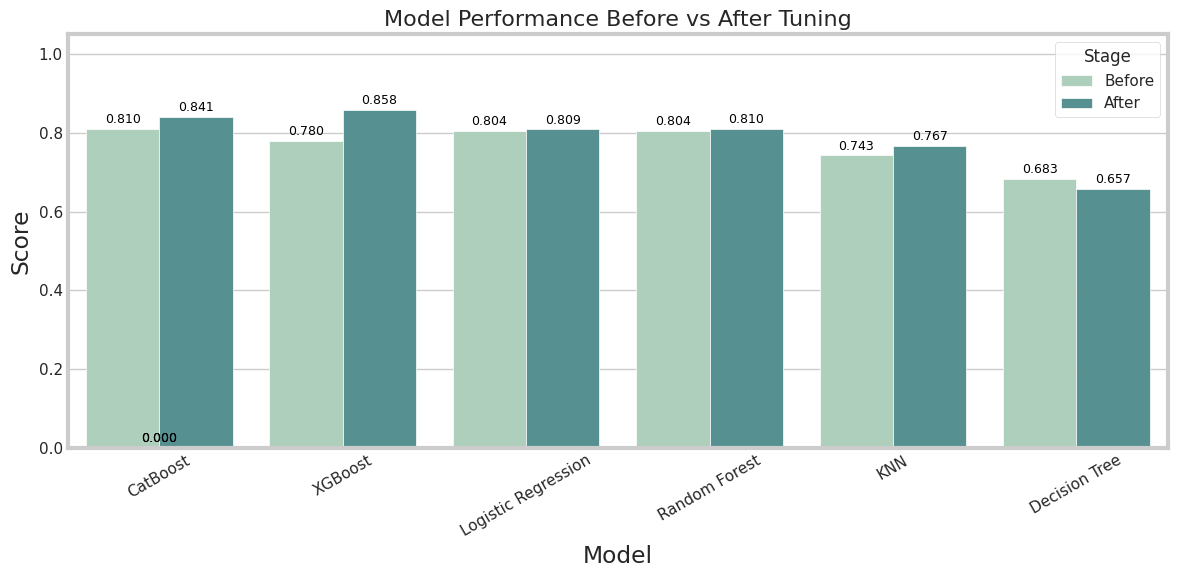

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Data (Before and After tuning)
# -----------------------------
before_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'CatBoost', 'XGBoost', 'KNN', 'Decision Tree'],
    'F2-score_before': [0.809482, 0.809211, 0.807581, 0.783828, 0.758394, 0.713442],
    'Recall_before': [0.822990, 0.825010, 0.821089, 0.793228, 0.765366, 0.711822],
    'AUC_before': [0.780060, 0.778947, 0.802683, 0.763186, 0.703979, 0.623453]
}

after_data = {
    'Model': ['CatBoost', 'Random Forest', 'Logistic Regression', 'XGBoost', 'KNN', 'Decision Tree'],
    'Best_Params': [
        "{'depth': 4, 'iterations': 200, 'learning_rate': 0.01}",
        "{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}",
        "{'C': 0.01, 'class_weight': None, 'penalty': 'l2'}",
        "{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}",
        "{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}",
        "{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}"
    ],
    'F2-score_after': [0.8857, 0.8125, 0.8218, 0.8670, 0.7680, 0.6575],
    'Recall_after': [0.9841, 0.8254, 0.8492, 0.9206, 0.7778, 0.6429],
    'AUC_after': [0.6528, 0.7919, 0.7555, 0.7879, 0.7549, 0.6715]
}

df_before = pd.DataFrame(before_data)
df_after = pd.DataFrame(after_data)
df = pd.merge(df_before, df_after, on='Model')
df_sorted = df.sort_values(by=['F2-score_after', 'Recall_after', 'AUC_after'], ascending=False).reset_index(drop=True)

# -----------------------------
# Bar chart with Before vs After + annotations
# -----------------------------
sns.set_style("whitegrid")
palette = ['#A8D5BA', '#4C9A9A']  # Before = light teal, After = darker teal

df_melted = df_sorted.melt(id_vars='Model',
                           value_vars=['F2-score_before', 'F2-score_after',
                                       'Recall_before', 'Recall_after',
                                       'AUC_before', 'AUC_after'],
                           var_name='Metric', value_name='Score')

df_melted['Stage'] = df_melted['Metric'].apply(lambda x: 'Before' if 'before' in x else 'After')
df_melted['Metric'] = df_melted['Metric'].apply(lambda x: x.split('_')[0])

plt.figure(figsize=(12,6))
barplot = sns.barplot(
    data=df_melted,
    x='Model',
    y='Score',
    hue='Stage',
    palette=palette,
    dodge=True,
    ci=None  # Disable confidence interval lines
)

# Annotate scores on top of bars
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.3f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=9, color='black', xytext=(0,2), textcoords='offset points')

plt.title('Model Performance Before vs After Tuning', fontsize=16)
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=30)
plt.legend(title='Stage')
plt.tight_layout()
plt.show()

